# Imports 

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from phenoseeker import BioproxyEvaluator
import pandas as pd


In [3]:
screens_folders = {
      #  "ChemBL": Path("/projects/synsight/repos/phenospace/bioproxy/screens_data_chembl"),
        "Curie": Path("/projects/synsight/repos/phenospace/bioproxy/screens_data_curie"),
        "ChEMBL": Path("/projects/synsight/repos/phenoseeker/data/ChEMBL/assays_csv"),
        "Lit-PCBA": Path("/projects/synsight/repos/phenoseeker/data/Lit_PCBA/csv_files"),
}

In [4]:
model = "openphenom"
base_path = Path("/projects/synsight/data/jump_embeddings/compounds_embeddings/")
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")

In [5]:
eval = BioproxyEvaluator(parquet_metadata, npy_file, screens_folders, embeddings_name=f'Embeddings_{model}', embeddings_entity='compound')

In [6]:
eval

BioproxyEvaluator with 3 sources (Curie: 16 screens, ChEMBL: 49 screens, Lit-PCBA: 5 screens)

In [7]:
model = "dinov2_g"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [8]:
model = "resnet50"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [9]:
model = "chada"
npy_file = base_path / model / "Embeddings_norm.npy"
parquet_metadata = base_path / model / Path("metadata.parquet")
eval.load(embedding_name=f'Embeddings_{model}', embeddings_file=npy_file, metadata_file=parquet_metadata)

In [10]:
chembl_results_of = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
chembl_results_dino = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
chembl_results_resnet50 = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
chembl_results_chada = eval.compute_enrichment_factors(source='ChEMBL', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])


Processing ChEMBL screens: 100%|██████████| 49/49 [00:31<00:00,  1.57it/s]


In [11]:
lit_pcba_results_of = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
lit_pcba_results_dino = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
lit_pcba_results_resnet50 = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
lit_pcba_results_chada = eval.compute_enrichment_factors(source='Lit-PCBA', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])


Processing Lit-PCBA screens: 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


In [12]:
curie_results_of = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_openphenom', thresholds=[1, 3, 5, 10])
curie_results_dino = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_dinov2_g', thresholds=[1, 3, 5, 10])
curie_results_resnet50 = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_resnet50', thresholds=[1, 3, 5, 10])
curie_results_chada = eval.compute_enrichment_factors(source='Curie', embeddings_name='Embeddings_chada', thresholds=[1, 3, 5, 10])

Processing Curie screens: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]


# Plot one model

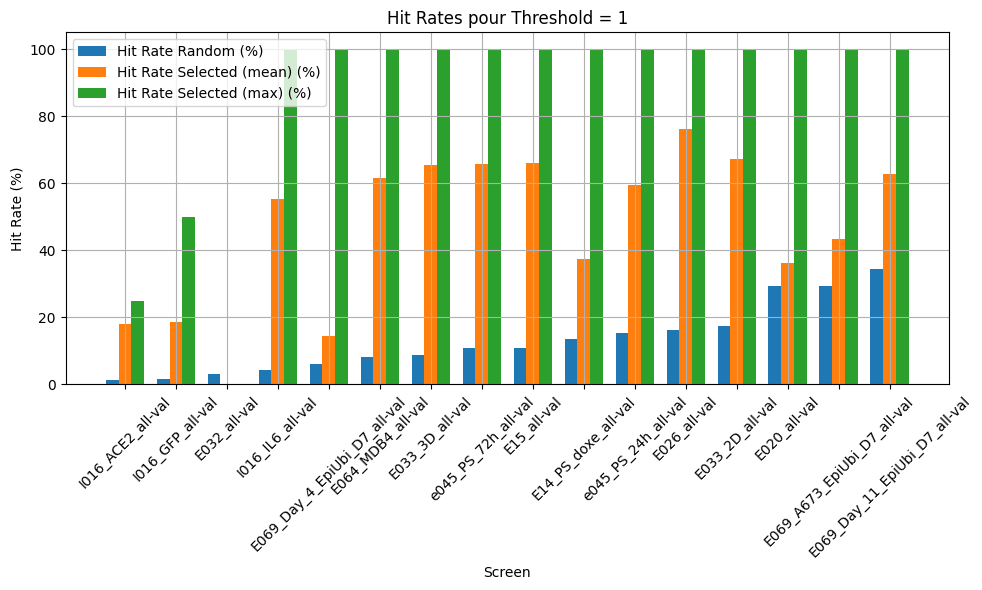

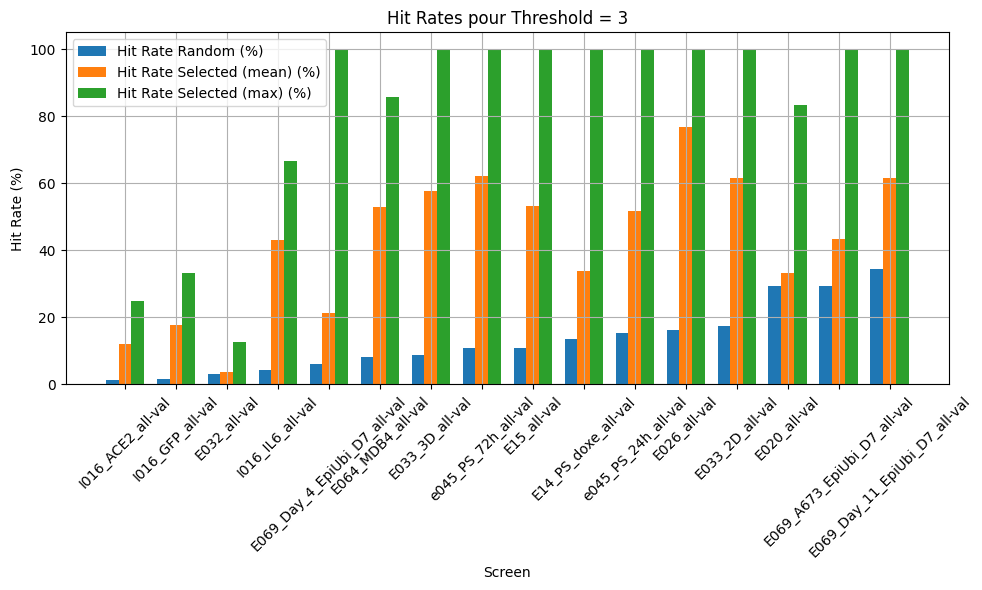

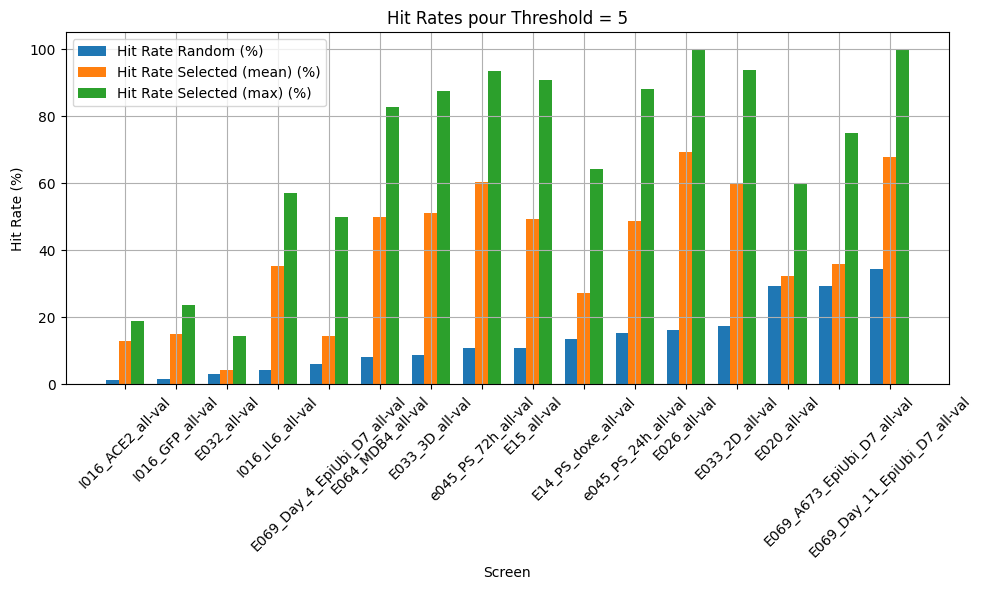

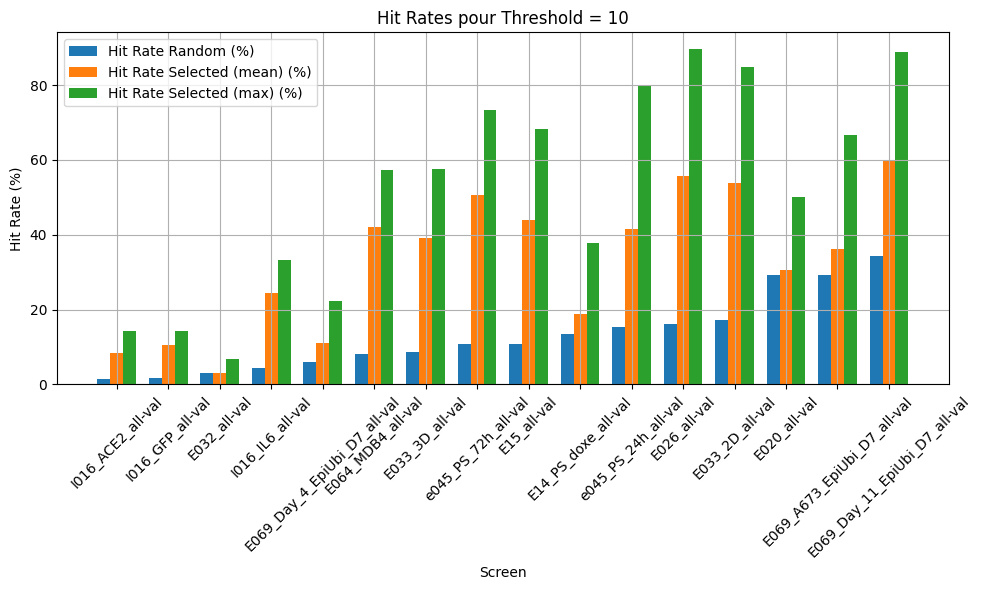

In [59]:
import matplotlib.pyplot as plt
import numpy as np

df = curie_results_dino[curie_results_dino[("N Hits", "mean")] > 3]


# Récupérer les valeurs uniques de Threshold et les trier si besoin
unique_thresholds = sorted(df[("Threshold",)].unique())

for thr in unique_thresholds:
    # Filtrer les données correspondant au threshold courant
    df_thr = df[df[("Threshold",)] == thr]
    
    # Trier les screens par ordre croissant de Hit Rate Random (mean)
    df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
    
    # Récupérer la liste des screens triés
    screens = df_thr_sorted[("Screen",)].tolist()
    x = np.arange(len(screens))
    width = 0.25  # largeur des barres

    # Extraire et multiplier par 100 pour avoir des pourcentages
    hit_rate_rand = df_thr_sorted[("Hit Rate Random", "mean")].values * 100
    hit_rate_sel_mean = df_thr_sorted[("Hit Rate Selected", "mean")].values * 100
    hit_rate_sel_max = df_thr_sorted[("Hit Rate Selected", "max")].values * 100
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Affichage des barres dans l'ordre : Random, Selected (mean), Selected (max)
    ax.bar(x - width, hit_rate_rand, width, label='Hit Rate Random (%)')
    ax.bar(x, hit_rate_sel_mean, width, label='Hit Rate Selected (mean) (%)')
    ax.bar(x + width, hit_rate_sel_max, width, label='Hit Rate Selected (max) (%)')
    
    # Personnalisation du graphique
    ax.set_xlabel("Screen")
    ax.set_ylabel("Hit Rate (%)")
    ax.set_title(f"Hit Rates pour Threshold = {thr}")
    ax.set_xticks(x)
    ax.set_xticklabels(screens, rotation=45)
    ax.legend()
    ax.grid(True)  # Ajout de la grille
    plt.tight_layout()
    plt.show()


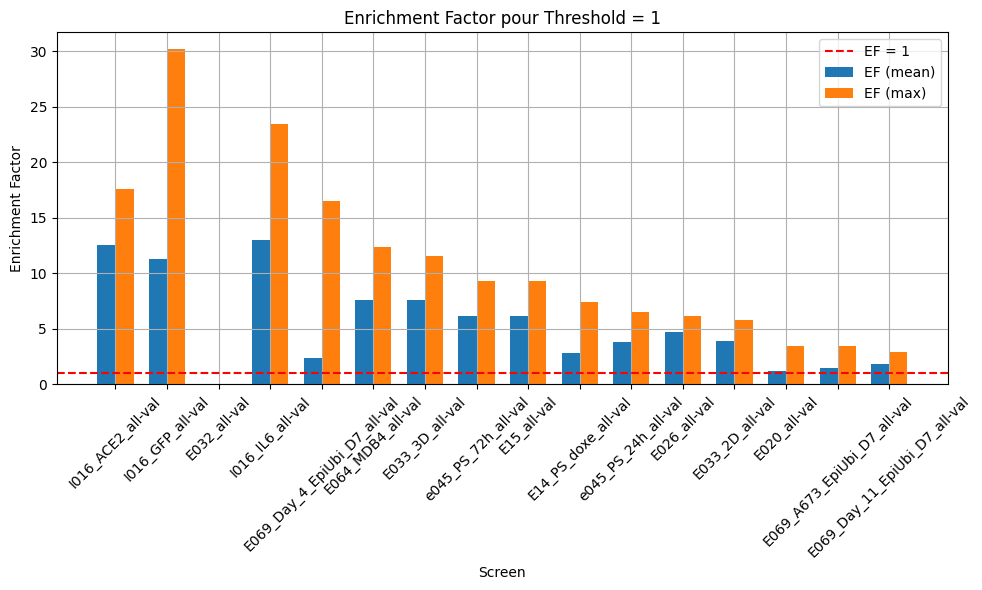

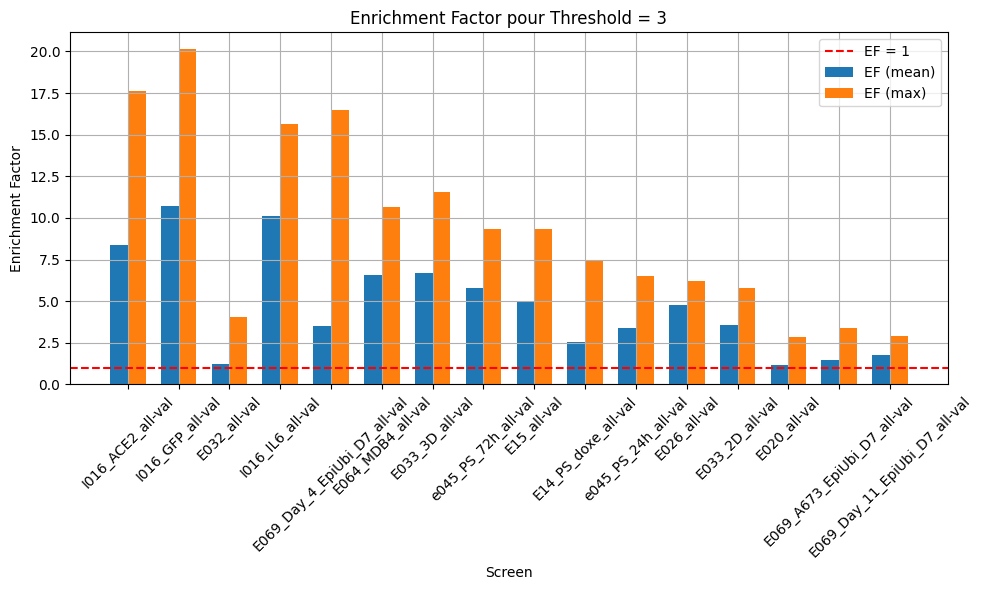

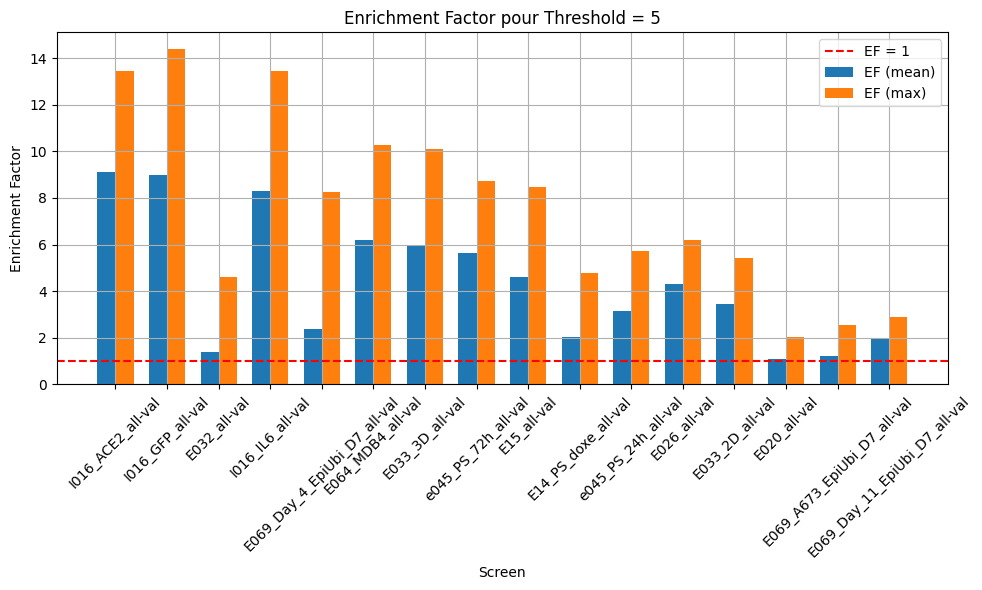

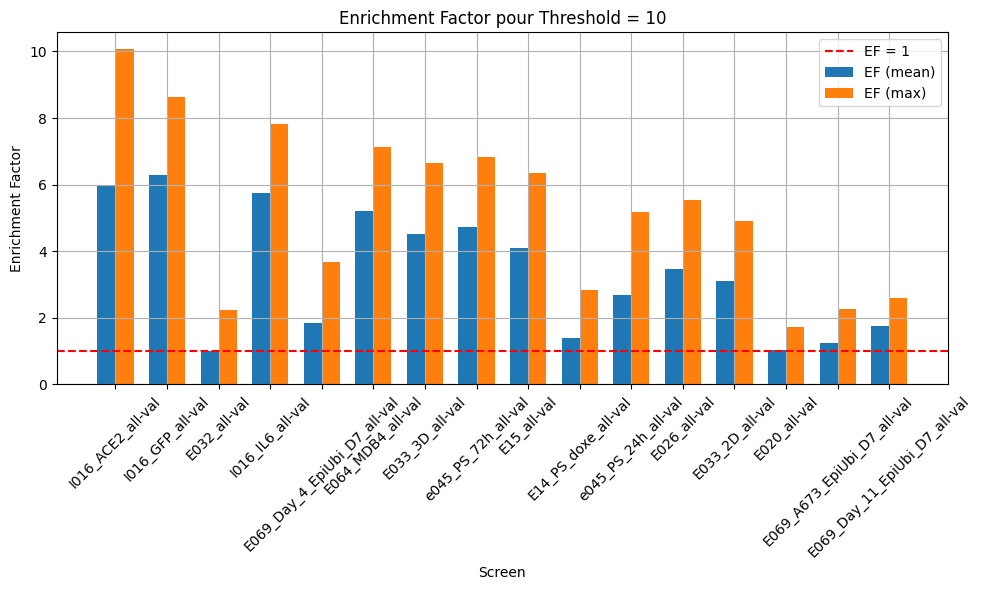

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que votre DataFrame s'appelle df

# Récupérer les valeurs uniques de Threshold et les trier si besoin
unique_thresholds = sorted(df[("Threshold",)].unique())

for thr in unique_thresholds:
    # Filtrer les données correspondant au threshold courant
    df_thr = df[df[("Threshold",)] == thr]
    
    # Trier les screens par ordre croissant de EF (mean)
    df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
    
    # Récupérer la liste des screens triés
    screens = df_thr_sorted[("Screen",)].tolist()
    x = np.arange(len(screens))
    width = 0.35  # largeur des barres
    
    # Extraire les valeurs d'EF
    ef_mean = df_thr_sorted[("EF", "mean")].values
    ef_max = df_thr_sorted[("EF", "max")].values
    
    # Création du graphique
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Affichage des barres pour EF (mean) et EF (max)
    ax.bar(x - width/2, ef_mean, width, label='EF (mean)')
    ax.bar(x + width/2, ef_max, width, label='EF (max)')
    
    # Ajout d'une ligne horizontale rouge en pointillé pour EF = 1
    ax.axhline(y=1, color='red', linestyle='--', label='EF = 1')
    
    # Personnalisation du graphique
    ax.set_xlabel("Screen")
    ax.set_ylabel("Enrichment Factor")
    ax.set_title(f"Enrichment Factor pour Threshold = {thr}")
    ax.set_xticks(x)
    ax.set_xticklabels(screens, rotation=45)
    ax.legend()
    ax.grid(True)  # Ajout de la grille
    plt.tight_layout()
    plt.show()


# Plot all models

In [16]:
models = {
    "DINOv2": curie_results_dino,
    "OpenPhenom": curie_results_of,
    "Resnet50": curie_results_resnet50,
    "ChAda": curie_results_chada,
}


# Use one model as a reference for the random hit rate values.
ref_df = models["ChAda"]
ref_df = ref_df[ref_df[("N Hits", "mean")] > 3]


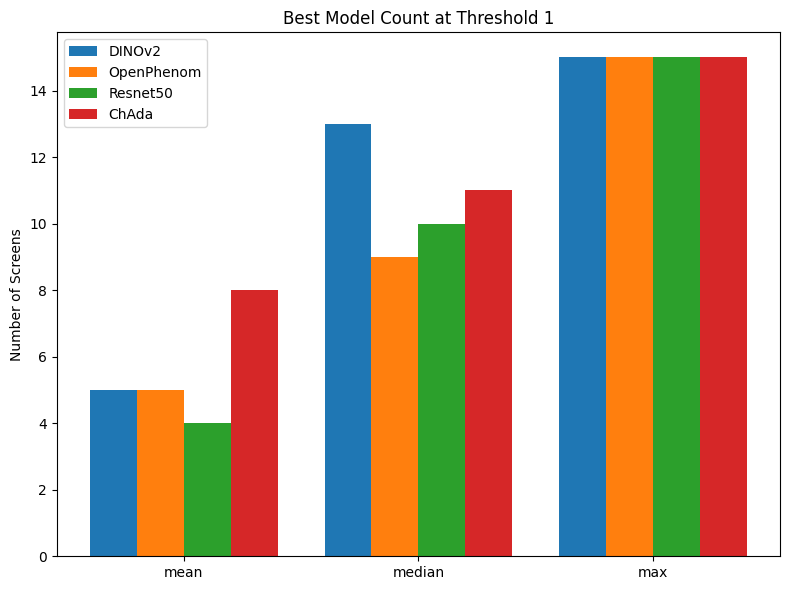

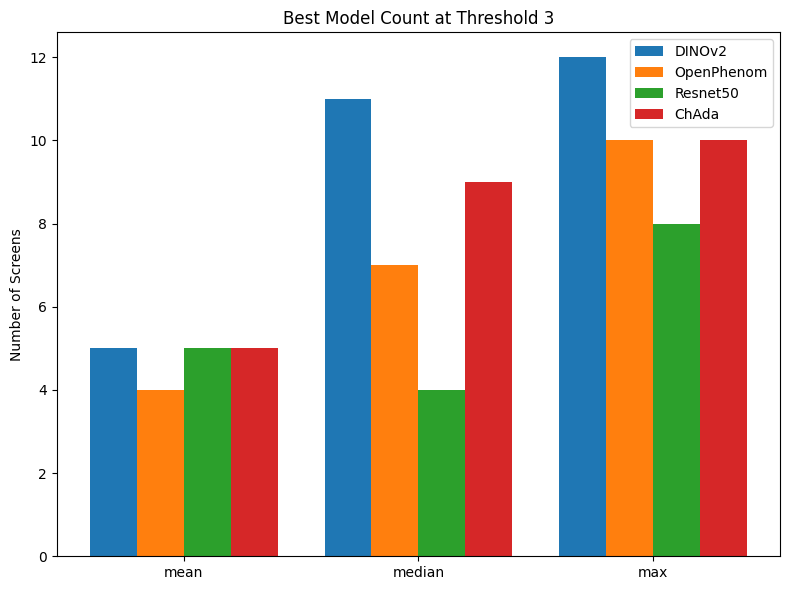

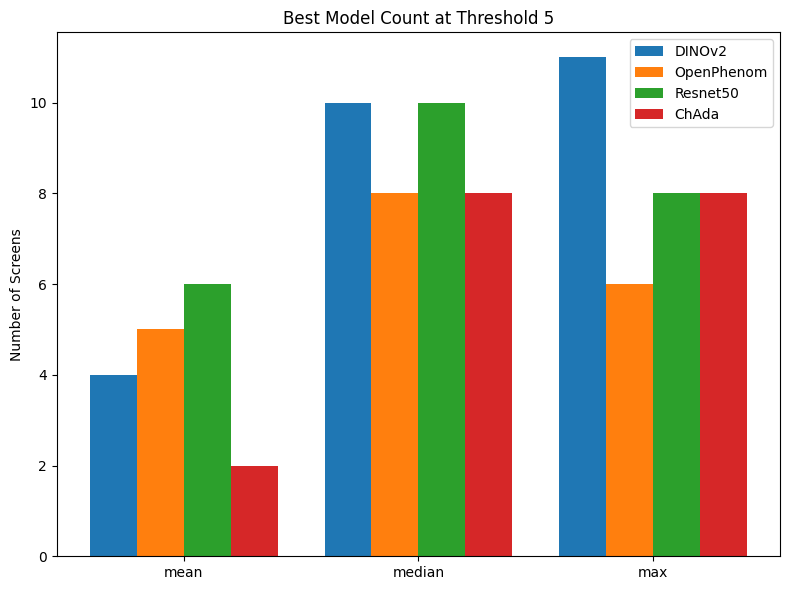

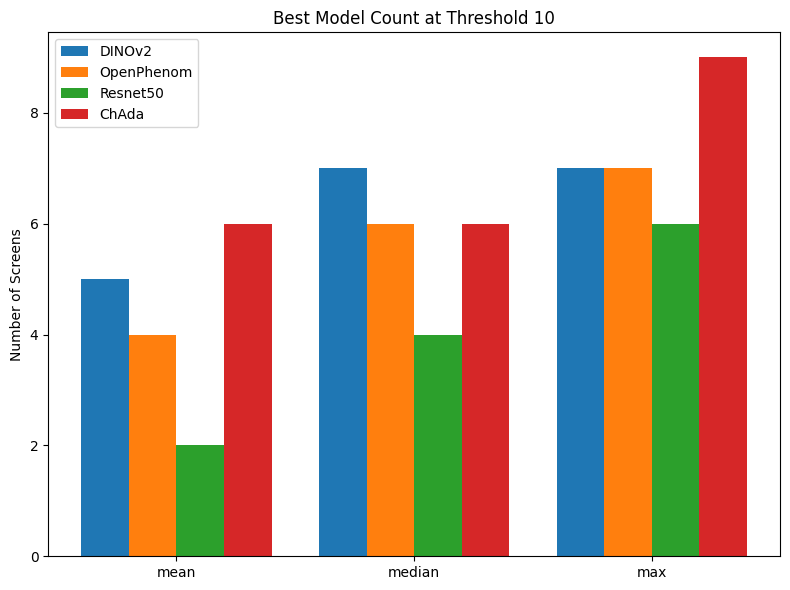

In [17]:
unique_thr = sorted(ref_df[("Threshold",)].unique())
measures = ["mean", "median", "max"]

for thr in unique_thr:
    # Build a dict with data indexed by Screen for each model
    common_screens = None
    model_data = {}
    for name, df in models.items():
        df_thr = df[df[("Threshold",)] == thr].copy()
        df_thr = df_thr.set_index(("Screen",))
        model_data[name] = df_thr
        screens = set(df_thr.index)
        if common_screens is None:
            common_screens = screens
        else:
            common_screens &= screens
    common_screens = sorted(common_screens)

    # Count best screens per measure.
    # In case of tie, both models get the point.
    best_counts = {m: {name: 0 for name in models} for m in measures}
    for screen in common_screens:
        for m in measures:
            best_val = max(
                df_thr.loc[screen][("Hit Rate Selected", m)]
                for df_thr in model_data.values()
            )
            for name, df_thr in model_data.items():
                val = df_thr.loc[screen][("Hit Rate Selected", m)]
                if val == best_val:
                    best_counts[m][name] += 1

    # Create a grouped bar plot using counts
    x = np.arange(len(measures))
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, name in enumerate(models):
        counts = [best_counts[m][name] for m in measures]
        ax.bar(x + i * bar_width, counts, bar_width, label=name)
    ax.set_xticks(x + (len(models) - 1) * bar_width / 2)
    ax.set_xticklabels(measures)
    ax.set_ylabel("Number of Screens")
    ax.set_title(f"Best Model Count at Threshold {thr}")
    ax.legend()
    plt.tight_layout()
    plt.show()

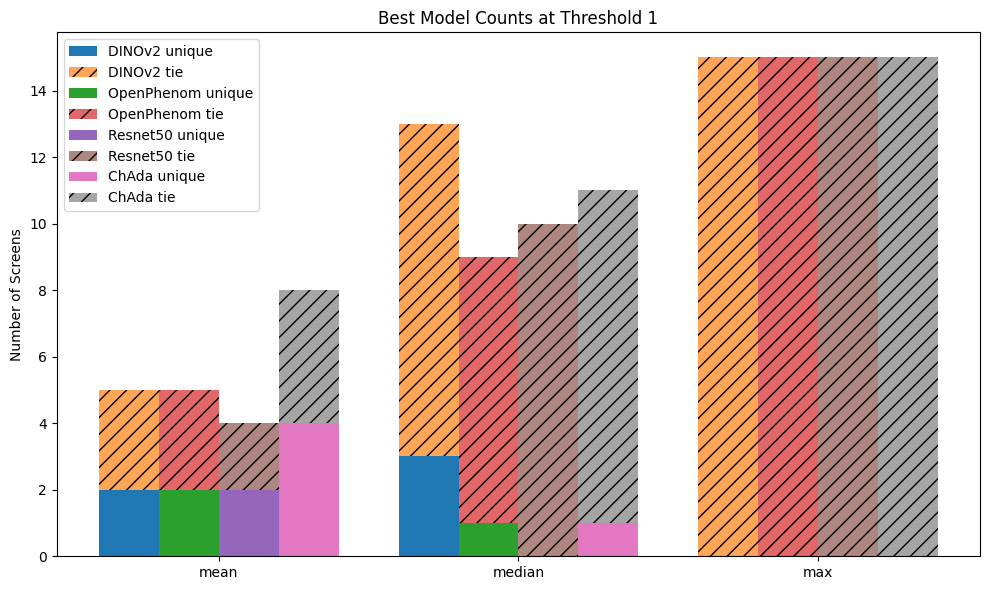

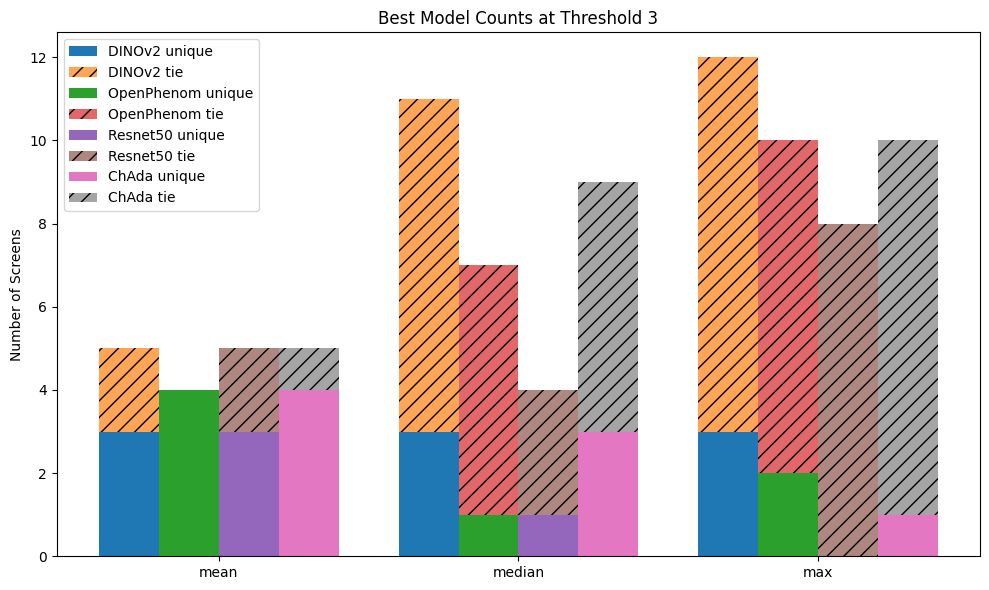

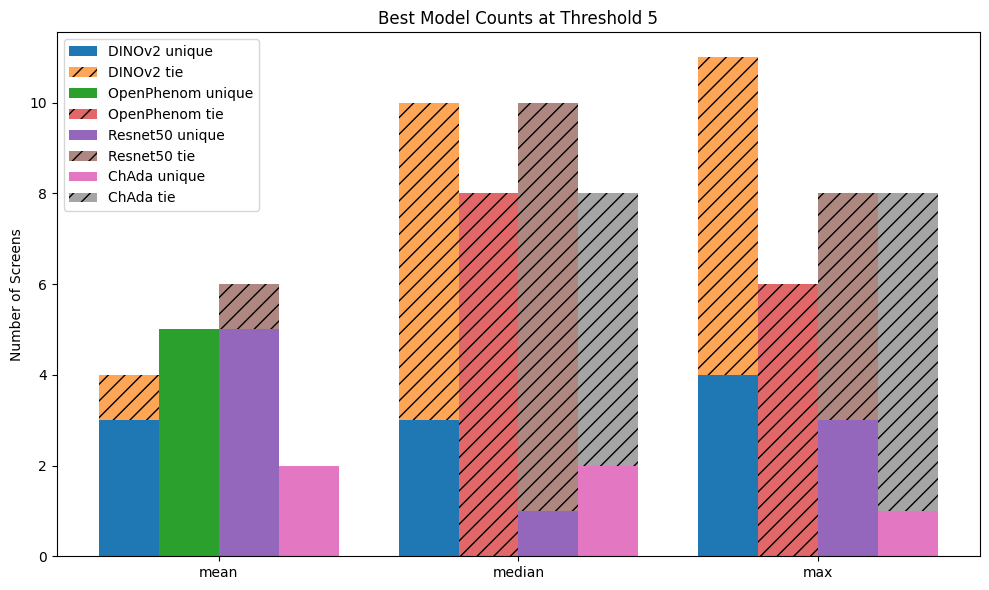

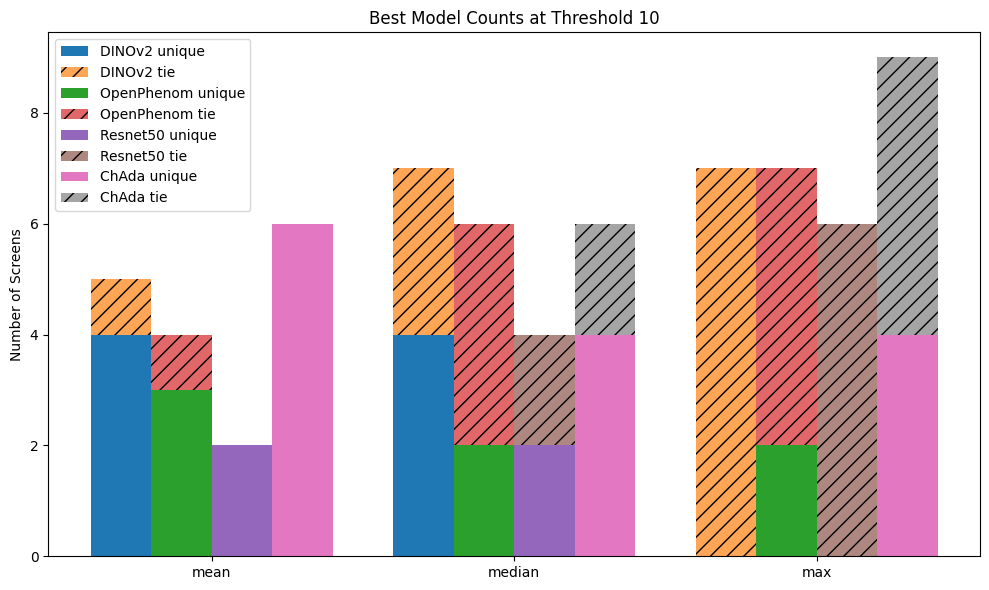

In [18]:


for thr in unique_thr:
    # Build a dict with data indexed by Screen for each model.
    common_screens = None
    model_data = {}
    for name, df in models.items():
        df_thr = df[df[("Threshold",)] == thr].copy()
        df_thr = df_thr.set_index(("Screen",))
        model_data[name] = df_thr
        screens = set(df_thr.index)
        if common_screens is None:
            common_screens = screens
        else:
            common_screens &= screens
    common_screens = sorted(common_screens)

    # Count unique wins and tie wins per measure.
    best_counts = {m: {name: {"unique": 0, "tie": 0} 
                 for name in models} for m in measures}
    for screen in common_screens:
        for m in measures:
            best_val = max(
                df_thr.loc[screen][("Hit Rate Selected", m)]
                for df_thr in model_data.values()
            )
            winners = []
            for name, df_thr in model_data.items():
                val = df_thr.loc[screen][("Hit Rate Selected", m)]
                if val == best_val:
                    winners.append(name)
            if len(winners) == 1:
                best_counts[m][winners[0]]["unique"] += 1
            elif len(winners) > 1:
                for name in winners:
                    best_counts[m][name]["tie"] += 1

    # Create a stacked bar plot.
    x = np.arange(len(measures))
    n_mod = len(models)
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(10, 6))
    for i, name in enumerate(models):
        unique_vals = [best_counts[m][name]["unique"] 
                       for m in measures]
        tie_vals = [best_counts[m][name]["tie"] 
                    for m in measures]
        pos = x + i * bar_width
        ax.bar(pos, unique_vals, bar_width, label=f"{name} unique")
        ax.bar(pos, tie_vals, bar_width, bottom=unique_vals,
               label=f"{name} tie", hatch='//', alpha=0.7)
    ax.set_xticks(x + (n_mod - 1) * bar_width / 2)
    ax.set_xticklabels(measures)
    ax.set_ylabel("Number of Screens")
    ax.set_title(f"Best Model Counts at Threshold {thr}")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
# Récupérer les seuils uniques triés à partir du DataFrame de référence.
unique_thr = sorted(ref_df[("Threshold",)].unique())

for thr in unique_thr:
    # Filtrer le DataFrame de référence pour le seuil courant
    df_ref_thr = ref_df[ref_df[("Threshold",)] == thr].copy()
    
    # On trie ici selon la colonne 'mean' de "Hit Rate Random"
    df_ref_thr.sort_values(by=("Hit Rate Random", "mean"), inplace=True)
    
    # Récupération de l'ordre des écrans
    screens = df_ref_thr[("Screen",)].tolist()
    x = np.arange(len(screens))  # positions de base (indices)
    
    # Création d'une figure avec 3 sous-graphiques côte à côte
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # On veut trois graphiques : mean, median, max
    for idx, measure in enumerate(["mean", "median", "max"]):
        ax = axes[idx]
        
        # Nombre total de « groupes » de barres = nombre de modèles + 1 (pour le random)
        n_total = len(models) + 1
        
        # Largeur de chaque barre : on fixe la largeur totale du « groupe » à 0.8
        bar_width = 0.8 / n_total
        
        # Offsets pour centrer le « groupe » de barres sur chaque x
        offsets = np.arange(n_total) * bar_width - (0.8 / 2) + (bar_width / 2)
        
        # 1) Tracer la barre "random"
        #    (si la colonne correspondante existe, par sécurité)
        if ("Hit Rate Random", measure) in df_ref_thr.columns:
            hit_rand = df_ref_thr[("Hit Rate Random", measure)].values * 100
            pos_rand = x + offsets[0]
            ax.bar(pos_rand, hit_rand, bar_width,
                   label=f"Hit Rate Random ({measure}) (%)")
        
        # 2) Tracer les barres pour chaque modèle
        for i, (name, df_mod) in enumerate(models.items(), start=1):
            df_mod_thr = df_mod[df_mod[("Threshold",)] == thr].copy()
            
            # On s'assure que l'ordre des écrans correspond à celui du DF de référence
            df_mod_thr = df_mod_thr.set_index(("Screen",))
            df_mod_thr = df_mod_thr.loc[screens].reset_index()
            
            if ("Hit Rate Selected", measure) in df_mod_thr.columns:
                hit_sel = df_mod_thr[("Hit Rate Selected", measure)].values * 100
                pos_mod = x + offsets[i]
                ax.bar(pos_mod, hit_sel, bar_width,
                       label=f"{name} Selected ({measure}) (%)")
        
        ax.set_xlabel("Screen")
        ax.set_ylabel("Hit Rate (%)")
        ax.set_title(f"Hit Rates for Threshold = {thr} - {measure.capitalize()}")
        ax.set_xticks(x)
        ax.set_xticklabels(screens, rotation=45)
        ax.grid(True)
        
        # Pour éviter la répétition des labels dans la légende,
        # on peut afficher la légende uniquement sur le dernier subplot
        # ou bien la laisser sur chaque subplot, à votre convenance.
        ax.legend()
    
    plt.tight_layout()
    plt.show()


# One Screen

In [22]:
df = chembl_results_resnet50

In [23]:
df[(df['Threshold'] ==5) & (df[('Normalized_EF', 'max')] == 100)].sort_values(by=('Hit Rate Random', 'mean'), ascending=True)

Source             Screen Threshold        EF                      \
                                              mean    median       max   
170  ChEMBL  CHEMBL3214967_val         5  2.085714  1.738095  5.214286   
174  ChEMBL  CHEMBL3215046_val         5  1.604167  1.833333  3.666667   
134  ChEMBL  CHEMBL2114784_val         5  2.215540  2.296296  3.444444   
102  ChEMBL  CHEMBL1794499_val         5  1.812865  2.222222  3.333333   
130  ChEMBL  CHEMBL2114780_val         5  2.052042  2.321550  3.237952   
98   ChEMBL  CHEMBL1794486_val         5  1.431818  1.125000  3.000000   
114  ChEMBL  CHEMBL1794584_val         5  1.737207  1.712073  2.739316   

    Normalized_EF                   Hit Rate Selected                 \
             mean     median    max              mean    median  max   
170     40.000000  33.333333  100.0          0.400000  0.333333  1.0   
174     43.750000  50.000000  100.0          0.437500  0.500000  1.0   
134     64.322120  66.666667  100.0          0.643221  0.666667  1.0   
102     54.385965  66.666667  100.0          0.543860  0.666667  1.0   
130     63.374695  71.698113  100.0          0.633747  0.716981  1.0   
98      47.727273  37.500000  100.0          0.477273  0.375000  1.0   
114     63.417553  62.500000  100.0          0.634176  0.625000  1.0   

    Hit Rate Random N Selected            N Hits N Compounds  
               mean       mean median max   mean        mean  
170        0.191781        3.0    3.0   3   14.0        73.0  
174        0.272727        4.0    4.0   4   27.0        99.0  
134        0.290323       18.0   18.0  18  108.0       372.0  
102        0.300000        3.0    3.0   3   18.0        60.0  
130        0.308837       53.0   53.0  53  332.0      1075.0  
98         0.333333        8.0    8.0   8   54.0       162.0  
114        0.365055       32.0   32.0  32  234.0       641.0

In [24]:
df[df['Screen']=='CHEMBL3214967_val']

Source             Screen Threshold        EF                      \
                                              mean    median       max   
168  ChEMBL  CHEMBL3214967_val         1  3.128571  5.214286  5.214286   
169  ChEMBL  CHEMBL3214967_val         3  2.433333  2.607143  5.214286   
170  ChEMBL  CHEMBL3214967_val         5  2.085714  1.738095  5.214286   
171  ChEMBL  CHEMBL3214967_val        10  1.390476  1.489796  2.979592   

    Normalized_EF                         Hit Rate Selected            \
             mean      median         max              mean    median   
168     60.000000  100.000000  100.000000          0.600000  1.000000   
169     46.666667   50.000000  100.000000          0.466667  0.500000   
170     40.000000   33.333333  100.000000          0.400000  0.333333   
171     26.666667   28.571429   57.142857          0.266667  0.285714   

              Hit Rate Random N Selected            N Hits N Compounds  
          max            mean       mean median max   mean        mean  
168  1.000000        0.191781        1.0    1.0   1   14.0        73.0  
169  1.000000        0.191781        2.0    2.0   2   14.0        73.0  
170  1.000000        0.191781        3.0    3.0   3   14.0        73.0  
171  0.571429        0.191781        7.0    7.0   7   14.0        73.0

In [25]:
df_test = eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].df

In [26]:
df_test.columns

Index(['Metadata_InChI_ID', 'Metadata_JCP2022', 'Metadata_InChI_x',
       'Metadata_Is_dmso', 'Metadata_InChIKey', 'Metadata_InChI_y',
       'Metadata_Bioactivity'],
      dtype='object')

In [27]:
df_test[df_test['Metadata_Bioactivity'] == "hit"]['Metadata_JCP2022'].tolist()

['JCP2022_102586',
 'JCP2022_000438',
 'JCP2022_115742',
 'JCP2022_034133',
 'JCP2022_005270',
 'JCP2022_079803',
 'JCP2022_018266',
 'JCP2022_017004',
 'JCP2022_002125',
 'JCP2022_114907',
 'JCP2022_101237',
 'JCP2022_027852',
 'JCP2022_050660',
 'JCP2022_058463',
 'JCP2022_000676']

In [28]:
df_dino = pd.DataFrame(eval.compute_ranking(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_resnet50", JCP2022_id="JCP2022_115742", plot=True))

In [29]:
df_dino = pd.DataFrame(eval.compute_ranking(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_dinov2_g", JCP2022_id="JCP2022_115742", plot=True))

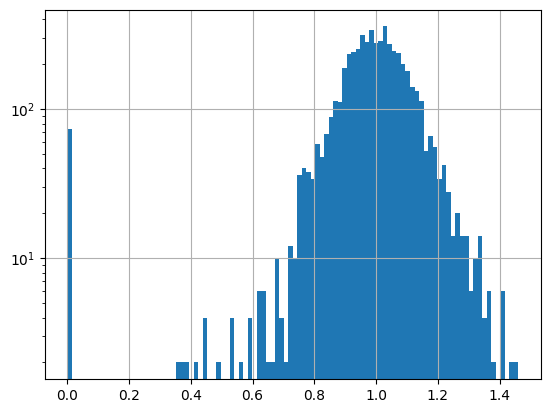

In [30]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_openphenom"].flatten(), bins=100, log=True)
plt.grid()
plt.show()

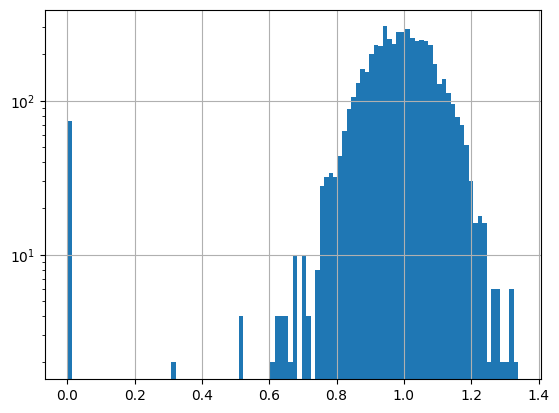

In [31]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_chada"].flatten(), bins=100, log=True)
plt.grid()
plt.show()

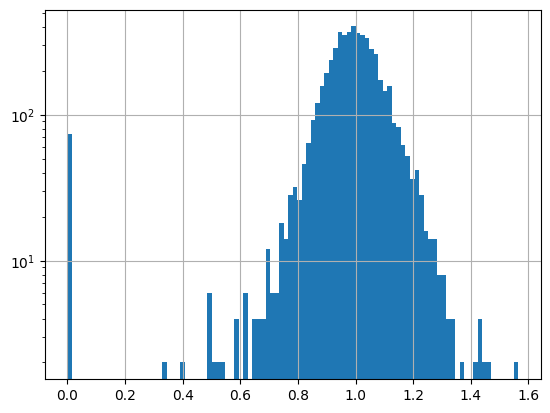

In [32]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices['cosine_distance_matrix_Embeddings_dinov2_g'].flatten(), bins=100, log=True)
plt.grid()
plt.show()

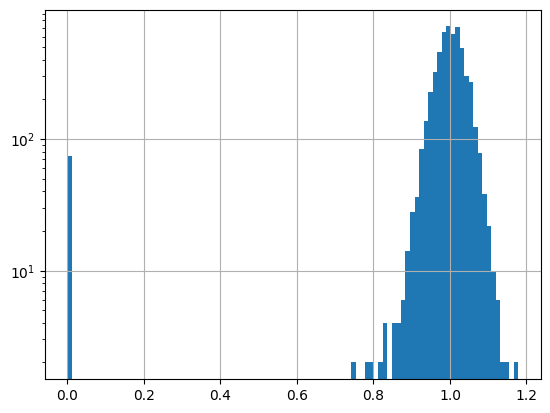

In [33]:
plt.hist(eval.screen_embedding_managers['ChEMBL']['CHEMBL3214967_val'].distance_matrices["cosine_distance_matrix_Embeddings_resnet50"].flatten(), bins=100, log=True)
plt.grid()

plt.show()

In [34]:
df_dino.head(15)

,Metadata_JCP2022,Distance,Bioactivity
0,JCP2022_107923,0.674748,none
1,JCP2022_009769,0.724139,none
2,JCP2022_017583,0.743428,none
3,JCP2022_000438,0.754369,hit
4,JCP2022_101237,0.785010,hit
5,JCP2022_005270,0.790112,hit
6,JCP2022_046679,0.817254,none
7,JCP2022_032389,0.822602,none
8,JCP2022_092979,0.843714,none
9,JCP2022_013436,0.864758,none


In [35]:
df.head(15)

Source             Screen Threshold        EF                      \
                                             mean    median       max   
0   ChEMBL  CHEMBL1613792_val         1  0.677340  0.000000  3.928571   
1   ChEMBL  CHEMBL1613792_val         3  0.587028  0.000000  2.619048   
2   ChEMBL  CHEMBL1613792_val         5  0.758621  0.785714  2.357143   
3   ChEMBL  CHEMBL1613792_val        10  0.985222  1.071429  1.785714   
4   ChEMBL  CHEMBL1613800_val         1  1.429587  0.000000  9.054054   
5   ChEMBL  CHEMBL1613800_val         3  1.524893  0.905405  4.527027   
6   ChEMBL  CHEMBL1613800_val         5  1.504045  1.697635  4.527027   
7   ChEMBL  CHEMBL1613800_val        10  1.234644  1.234644  2.743653   
8   ChEMBL  CHEMBL1613808_val         1  1.861111  1.675000  3.350000   
9   ChEMBL  CHEMBL1613808_val         3  1.597454  1.675000  2.931250   
10  ChEMBL  CHEMBL1613808_val         5  1.472982  1.546154  2.576923   
11  ChEMBL  CHEMBL1613808_val        10  1.355271  1.288462  2.190385   
12  ChEMBL  CHEMBL1613842_val         1  0.911338  0.841065  2.018555   
13  ChEMBL  CHEMBL1613842_val         3  0.944929  0.936772  1.598023   
14  ChEMBL  CHEMBL1613842_val         5  0.956278  0.955519  1.581549   

   Normalized_EF                        Hit Rate Selected                      \
            mean     median         max              mean    median       max   
0      17.241379   0.000000  100.000000          0.172414  0.000000  1.000000   
1      14.942529   0.000000   66.666667          0.149425  0.000000  0.666667   
2      19.310345  20.000000   60.000000          0.193103  0.200000  0.600000   
3      25.078370  27.272727   45.454545          0.250784  0.272727  0.454545   
4      15.789474   0.000000  100.000000          0.157895  0.000000  1.000000   
5      16.842105  10.000000   50.000000          0.168421  0.100000  0.500000   
6      16.611842  18.750000   50.000000          0.166118  0.187500  0.500000   
7      13.636364  13.636364   30.303030          0.136364  0.136364  0.303030   
8      55.555556  50.000000  100.000000          0.555556  0.500000  1.000000   
9      47.685185  50.000000   87.500000          0.476852  0.500000  0.875000   
10     43.969611  46.153846   76.923077          0.439696  0.461538  0.769231   
11     40.455840  38.461538   65.384615          0.404558  0.384615  0.653846   
12     28.514543  26.315789   63.157895          0.285145  0.263158  0.631579   
13     29.565563  29.310345   50.000000          0.295656  0.293103  0.500000   
14     29.920646  29.896907   49.484536          0.299206  0.298969  0.494845   

   Hit Rate Random N Selected            N Hits N Compounds  
              mean       mean median max   mean        mean  
0         0.254545        1.0    1.0   1   28.0       110.0  
1         0.254545        3.0    3.0   3   28.0       110.0  
2         0.254545        5.0    5.0   5   28.0       110.0  
3         0.254545       11.0   11.0  11   28.0       110.0  
4         0.110448        3.0    3.0   3   37.0       335.0  
5         0.110448       10.0   10.0  10   37.0       335.0  
6         0.110448       16.0   16.0  16   37.0       335.0  
7         0.110448       33.0   33.0  33   37.0       335.0  
8         0.298507        2.0    2.0   2   80.0       268.0  
9         0.298507        8.0    8.0   8   80.0       268.0  
10        0.298507       13.0   13.0  13   80.0       268.0  
11        0.298507       26.0   26.0  26   80.0       268.0  
12        0.312887       19.0   19.0  19  607.0      1940.0  
13        0.312887       58.0   58.0  58  607.0      1940.0  
14        0.312887       97.0   97.0  97  607.0      1940.0

In [36]:
eval.compute_enrichment_factor_for_screen(source="ChEMBL", screen="CHEMBL3214967_val", embeddings_name="Embeddings_resnet50", thresholds=[5])

,Source,Screen,Metadata_JCP2022,Threshold,EF,Normalized_EF,Hit Rate Selected,Hit Rate Random,N Selected,N Hits,N Compounds
0,ChEMBL,CHEMBL3214967_val,JCP2022_102586,5,3.476190,66.666667,0.666667,0.191781,3,14,73
1,ChEMBL,CHEMBL3214967_val,JCP2022_000438,5,3.476190,66.666667,0.666667,0.191781,3,14,73
2,ChEMBL,CHEMBL3214967_val,JCP2022_115742,5,5.214286,100.000000,1.000000,0.191781,3,14,73
3,ChEMBL,CHEMBL3214967_val,JCP2022_034133,5,3.476190,66.666667,0.666667,0.191781,3,14,73
4,ChEMBL,CHEMBL3214967_val,JCP2022_005270,5,3.476190,66.666667,0.666667,0.191781,3,14,73
5,ChEMBL,CHEMBL3214967_val,JCP2022_079803,5,0.000000,0.000000,0.000000,0.191781,3,14,73
6,ChEMBL,CHEMBL3214967_val,JCP2022_018266,5,1.738095,33.333333,0.333333,0.191781,3,14,73
7,ChEMBL,CHEMBL3214967_val,JCP2022_017004,5,0.000000,0.000000,0.000000,0.191781,3,14,73
8,ChEMBL,CHEMBL3214967_val,JCP2022_002125,5,0.000000,0.000000,0.000000,0.191781,3,14,73
9,ChEMBL,CHEMBL3214967_val,JCP2022_114907,5,1.738095,33.333333,0.333333,0.191781,3,14,73


# Clean figures

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named df and already defined
threshold_value = 5  # Change as needed



In [39]:
df = chembl_results_dino

In [69]:
chembl_results_dino

Source             Screen Threshold        EF                      \
                                              mean    median       max   
0    ChEMBL  CHEMBL1613792_val         1  1.354680  0.000000  3.928571   
1    ChEMBL  CHEMBL1613792_val         3  1.354680  1.309524  2.619048   
2    ChEMBL  CHEMBL1613792_val         5  1.273399  1.571429  3.142857   
3    ChEMBL  CHEMBL1613792_val        10  1.280788  1.071429  2.500000   
4    ChEMBL  CHEMBL1613800_val         1  1.747274  0.000000  6.036036   
..      ...                ...       ...       ...       ...       ...   
191  ChEMBL  CHEMBL3562077_val        10  1.384781  1.146715  2.989650   
192  ChEMBL  CHEMBL3562110_val         1  0.000000  0.000000  0.000000   
193  ChEMBL  CHEMBL3562110_val         3  1.700000  0.000000  8.500000   
194  ChEMBL  CHEMBL3562110_val         5  1.133333  0.000000  5.666667   
195  ChEMBL  CHEMBL3562110_val        10  2.092308  2.615385  5.230769   

    Normalized_EF                        Hit Rate Selected            \
             mean     median         max              mean    median   
0       34.482759   0.000000  100.000000          0.344828  0.000000   
1       34.482759  33.333333   66.666667          0.344828  0.333333   
2       32.413793  40.000000   80.000000          0.324138  0.400000   
3       32.601881  27.272727   63.636364          0.326019  0.272727   
4       19.298246   0.000000   66.666667          0.192982  0.000000   
..            ...        ...         ...               ...       ...   
191     14.267092  11.814346   30.801688          0.142671  0.118143   
192      0.000000   0.000000    0.000000          0.000000  0.000000   
193      5.000000   0.000000   25.000000          0.050000  0.000000   
194      5.000000   0.000000   25.000000          0.033333  0.000000   
195     20.000000  25.000000   50.000000          0.061538  0.076923   

              Hit Rate Random N Selected             N Hits N Compounds  
          max            mean       mean median  max   mean        mean  
0    1.000000        0.254545        1.0    1.0    1   28.0       110.0  
1    0.666667        0.254545        3.0    3.0    3   28.0       110.0  
2    0.800000        0.254545        5.0    5.0    5   28.0       110.0  
3    0.636364        0.254545       11.0   11.0   11   28.0       110.0  
4    0.666667        0.110448        3.0    3.0    3   37.0       335.0  
..        ...             ...        ...    ...  ...    ...         ...  
191  0.308017        0.103028      237.0  237.0  237  245.0      2378.0  
192  0.000000        0.029412        1.0    1.0    1    4.0       136.0  
193  0.250000        0.029412        4.0    4.0    4    4.0       136.0  
194  0.166667        0.029412        6.0    6.0    6    4.0       136.0  
195  0.153846        0.029412       13.0   13.0   13    4.0       136.0  

[196 rows x 18 columns]

In [109]:
def plot_EF(df, source,figsize=(10, 5), screen_names=False):

    for thr in unique_thresholds:
        # Filtrer les données correspondant au threshold courant
        df_thr = df[df[("Threshold",)] == thr]
        
        # Trier les screens par ordre croissant de EF (mean)
        df_thr_sorted = df_thr.sort_values(by=( "Hit Rate Random", "mean"))
        
        # Récupérer la liste des screens triés
        screens = df_thr_sorted[("Screen",)].tolist()
        x = np.arange(len(screens))
        width = 0.35  # largeur des barres
        
        # Extraire les valeurs d'EF
        ef_mean = df_thr_sorted[("EF", "mean")].values
        ef_max = df_thr_sorted[("EF", "max")].values
        # Création du graphique
        fig, ax = plt.subplots(figsize=figsize)
        
        # Affichage des barres pour EF (mean) et EF (max)
        ax.bar(x - width/3, ef_mean, width, label='EF (mean)')
        ax.bar(x + width/3, ef_max, width, label='EF (max)')
        
        # Ajout d'une ligne horizontale rouge en pointillé pour EF = 1
        ax.axhline(y=1, color='red', linestyle='--', label='EF = 1')
        
        # Personnalisation du graphique
        ax.set_xlabel("Screens")
        ax.set_ylabel("Enrichment Factor")
        ax.set_title(f"Enrichment Factor @{thr}% for {source}")
        ax.set_xticks(x)
        if screen_names:
            ax.set_xticklabels(screens, rotation=45)
        else:
            ax.set_xticklabels("", rotation=45)
        ax.legend()
        ax.grid(True)  # Ajout de la grille
        plt.tight_layout()
        plt.show()


In [40]:
def plot_result_model(df, threshold_value=5, figsize=(20, 10), plot_names=False):
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter the dataframe
    df = df[df[("N Hits", "mean")] > 3]
    df_threshold = df[df[('Threshold', '')] == threshold_value].copy()
    df_threshold.sort_values(('Hit Rate Random', 'mean'), inplace=True)

    x = np.arange(len(df_threshold))
    width = 0.25

    # Extract values
    baseline = df_threshold[('Hit Rate Random', 'mean')] * 100
    mean_enrichment = df_threshold[('Normalized_EF', 'mean')]
    max_enrichment = df_threshold[('Normalized_EF', 'max')]

    # Colors in order: Purple, Green, Blue
    colors = {
        'baseline': 'purple',
        'mean': 'green',
        'max': 'blue'
    }

    _, ax = plt.subplots(figsize=figsize)

    # Plot grouped bars
    ax.bar(x - width, baseline, width, color=colors['baseline'],
           label='Baseline: Original Selection of Compounds')
    ax.bar(x, mean_enrichment, width, color=colors['mean'],
           label='Mean Enrichment Achieved by Our Method')
    ax.bar(x + width, max_enrichment, width, color=colors['max'],
           label='Maximum Enrichment Achieved by Our Method')

    # Adapt x-axis tick labels based on the plot_names flag
    ax.set_xticks(x)
    if plot_names:
        # Align labels to the right without rotation
        ax.set_xticklabels(df_threshold[('Screen', '')], rotation=0, ha='right')
    else:
        ax.set_xticklabels("", ha='right')

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Place the legend outside the plot area
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Increase the font size of both x and y axis tick labels
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    plt.tight_layout()
    plt.show()


In [58]:
chembl_results_chada

Source             Screen Threshold        EF                      \
                                              mean    median       max   
0    ChEMBL  CHEMBL1613792_val         1  0.948276  0.000000  3.928571   
1    ChEMBL  CHEMBL1613792_val         3  0.993432  1.309524  3.928571   
2    ChEMBL  CHEMBL1613792_val         5  1.273399  1.571429  3.928571   
3    ChEMBL  CHEMBL1613792_val        10  1.231527  1.071429  2.500000   
4    ChEMBL  CHEMBL1613800_val         1  1.906117  0.000000  6.036036   
..      ...                ...       ...       ...       ...       ...   
191  ChEMBL  CHEMBL3562077_val        10  1.424404  1.228623  3.071558   
192  ChEMBL  CHEMBL3562110_val         1  0.000000  0.000000  0.000000   
193  ChEMBL  CHEMBL3562110_val         3  0.000000  0.000000  0.000000   
194  ChEMBL  CHEMBL3562110_val         5  0.000000  0.000000  0.000000   
195  ChEMBL  CHEMBL3562110_val        10  0.000000  0.000000  0.000000   

    Normalized_EF                        Hit Rate Selected            \
             mean     median         max              mean    median   
0       24.137931   0.000000  100.000000          0.241379  0.000000   
1       25.287356  33.333333  100.000000          0.252874  0.333333   
2       32.413793  40.000000  100.000000          0.324138  0.400000   
3       31.347962  27.272727   63.636364          0.313480  0.272727   
4       21.052632   0.000000   66.666667          0.210526  0.000000   
..            ...        ...         ...               ...       ...   
191     14.675311  12.658228   31.645570          0.146753  0.126582   
192      0.000000   0.000000    0.000000          0.000000  0.000000   
193      0.000000   0.000000    0.000000          0.000000  0.000000   
194      0.000000   0.000000    0.000000          0.000000  0.000000   
195      0.000000   0.000000    0.000000          0.000000  0.000000   

              Hit Rate Random N Selected             N Hits N Compounds  
          max            mean       mean median  max   mean        mean  
0    1.000000        0.254545        1.0    1.0    1   28.0       110.0  
1    1.000000        0.254545        3.0    3.0    3   28.0       110.0  
2    1.000000        0.254545        5.0    5.0    5   28.0       110.0  
3    0.636364        0.254545       11.0   11.0   11   28.0       110.0  
4    0.666667        0.110448        3.0    3.0    3   37.0       335.0  
..        ...             ...        ...    ...  ...    ...         ...  
191  0.316456        0.103028      237.0  237.0  237  245.0      2378.0  
192  0.000000        0.029412        1.0    1.0    1    4.0       136.0  
193  0.000000        0.029412        4.0    4.0    4    4.0       136.0  
194  0.000000        0.029412        6.0    6.0    6    4.0       136.0  
195  0.000000        0.029412       13.0   13.0   13    4.0       136.0  

[196 rows x 18 columns]

In [41]:
def plot_result_model(df, threshold_value=5, figsize=(20, 10), plot_names=False):
    import numpy as np
    import matplotlib.pyplot as plt

    # Filter the dataframe
    df = df[df[("N Hits", "mean")] > 3]
    df_threshold = df[df[('Threshold', '')] == threshold_value].copy()
    df_threshold.sort_values(('Hit Rate Random', 'mean'), inplace=True)

    x = np.arange(len(df_threshold))
    width = 0.25

    # Extract values
    baseline = df_threshold[('Hit Rate Random', 'mean')] * 100
    mean_enrichment = df_threshold[('Normalized_EF', 'mean')]
    max_enrichment = df_threshold[('Normalized_EF', 'max')]

    # Colors in order: Purple, Green, Blue
    colors = {
        'baseline': 'purple',
        'mean': 'green',
        'max': 'blue'
    }

    _, ax = plt.subplots(figsize=figsize)

    # Plot grouped bars
    ax.bar(x - width, baseline, width, color=colors['baseline'],
           label='Baseline: Original Selection of Compounds')
    ax.bar(x, mean_enrichment, width, color=colors['mean'],
           label='Mean Enrichment Achieved by Our Method')
    ax.bar(x + width, max_enrichment, width, color=colors['max'],
           label='Maximum Enrichment Achieved by Our Method')

    # Adapt x-axis tick labels based on the plot_names flag
    ax.set_xticks(x)
    if plot_names:
        # Align labels to the right without rotation
        ax.set_xticklabels(df_threshold[('Screen', '')], rotation=0, ha='right')
    else:
        ax.set_xticklabels("", ha='right')

    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')


    # Add grid for better readability
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Increase the font size of both x and y axis tick labels
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

    plt.tight_layout()
    plt.show()

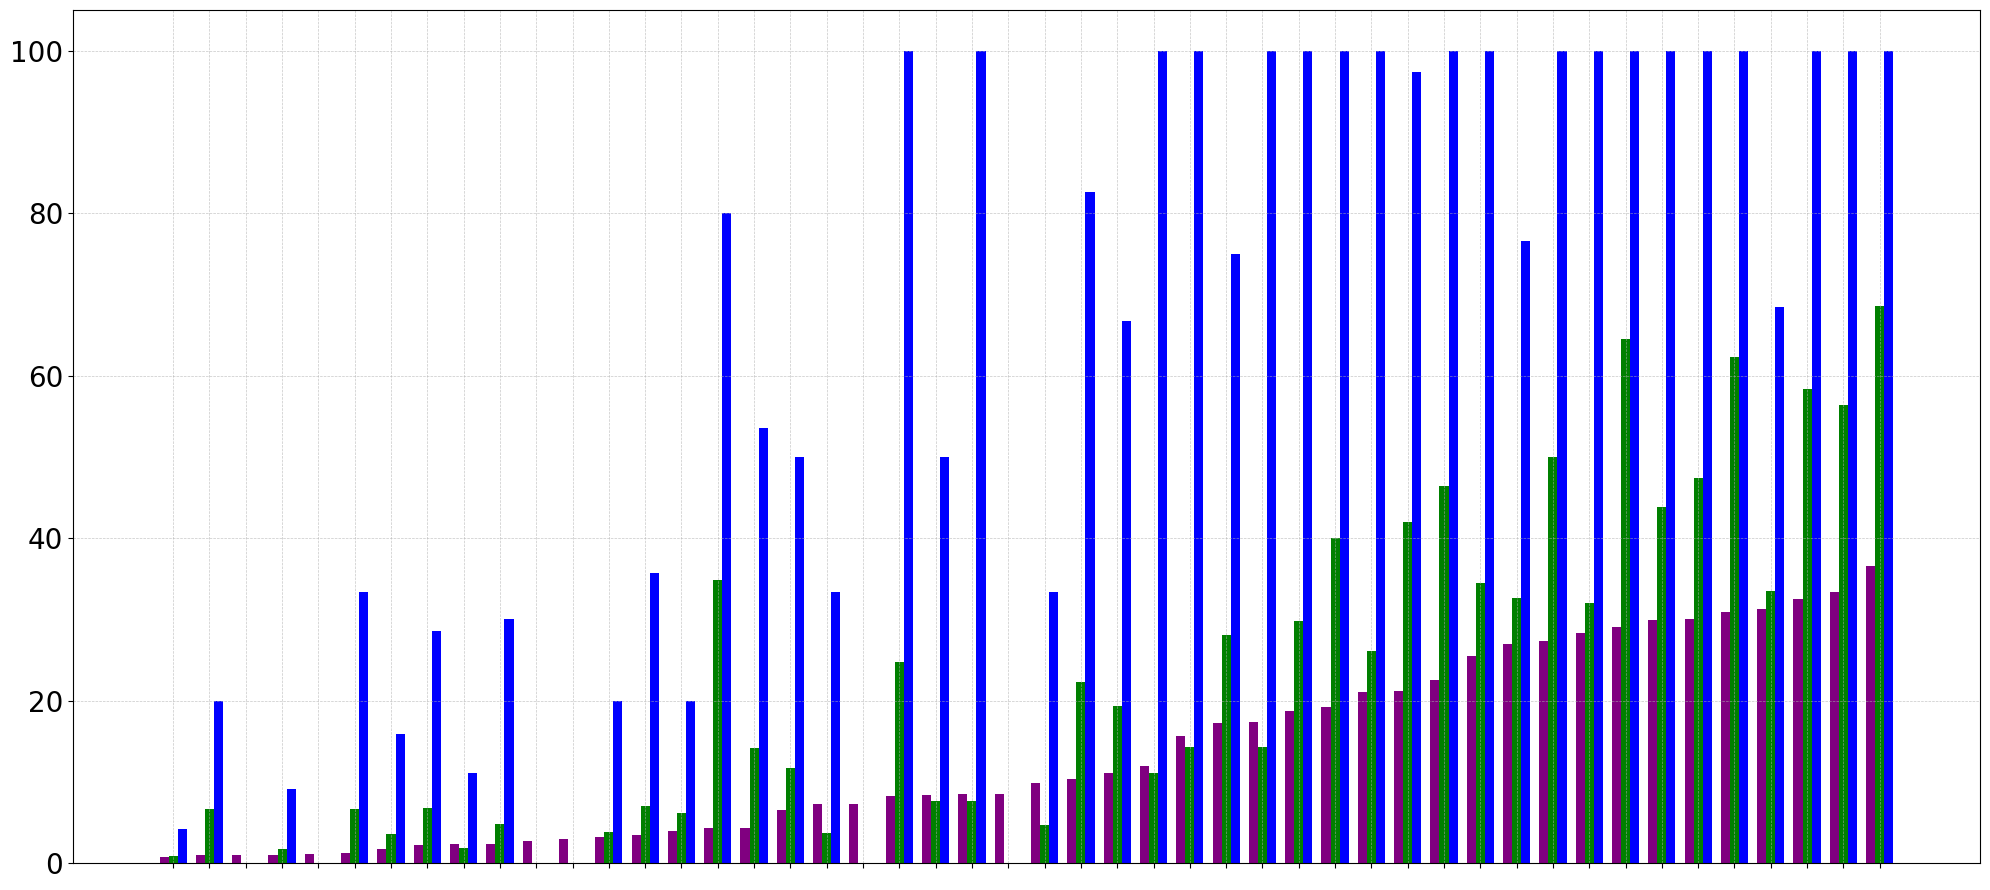

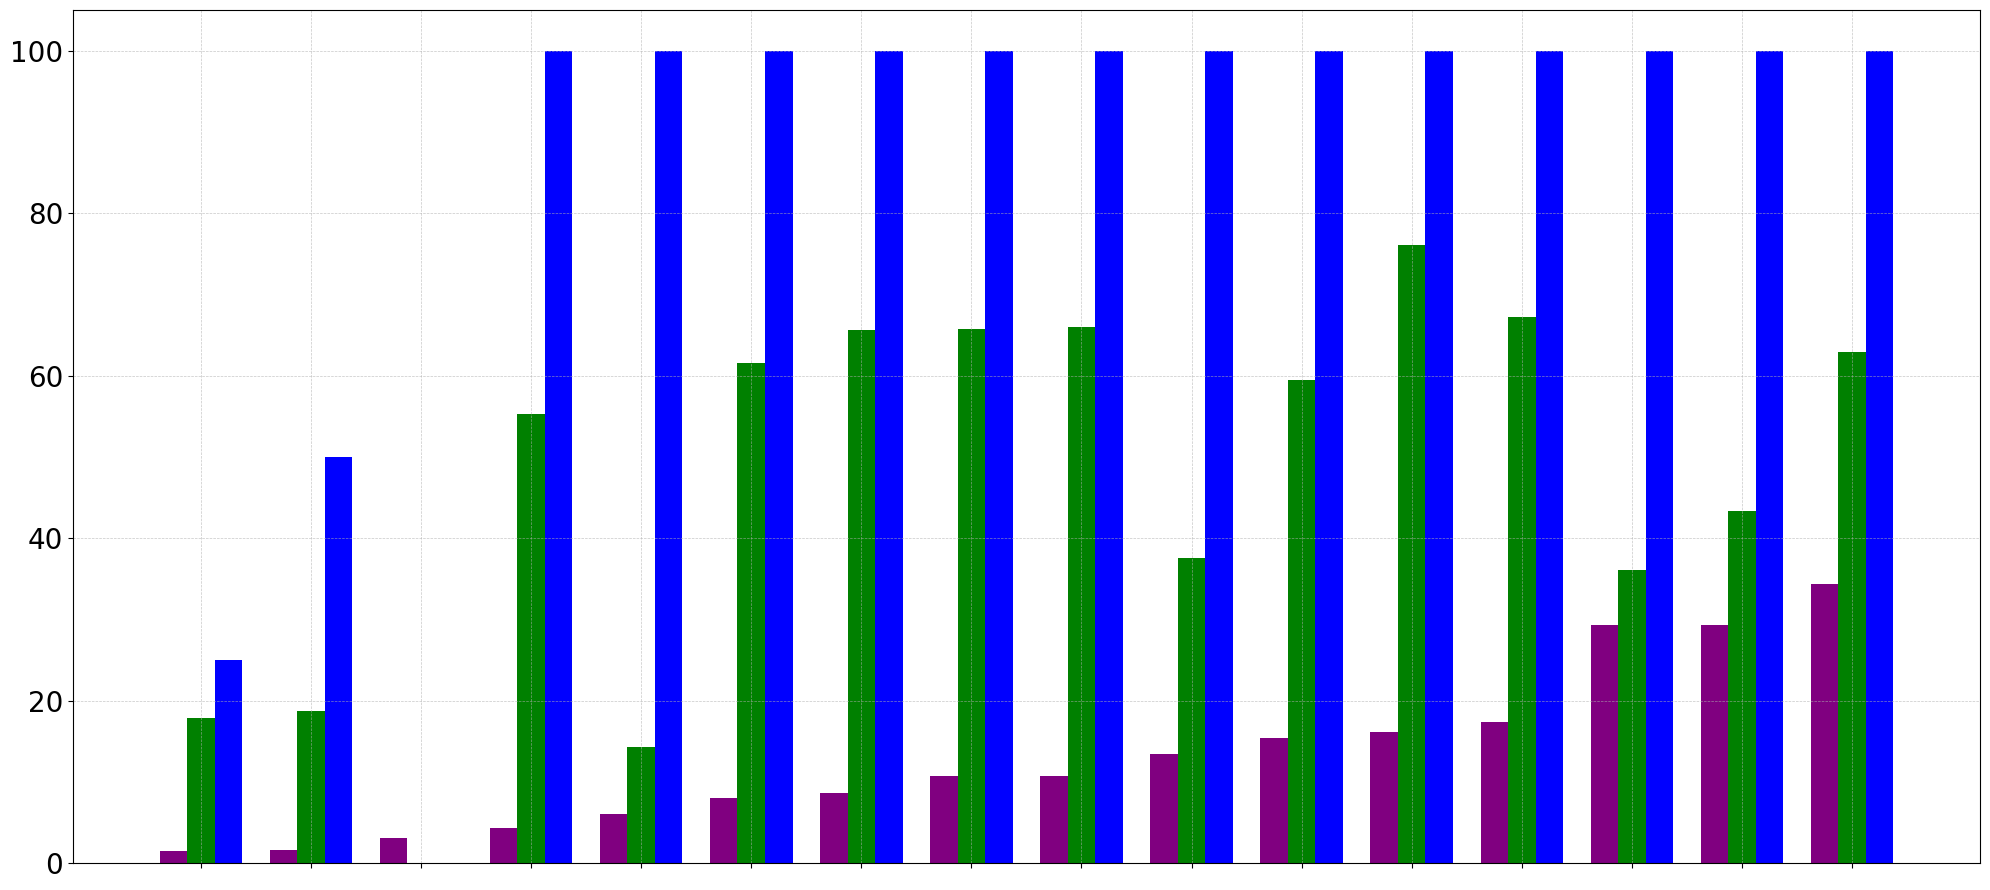

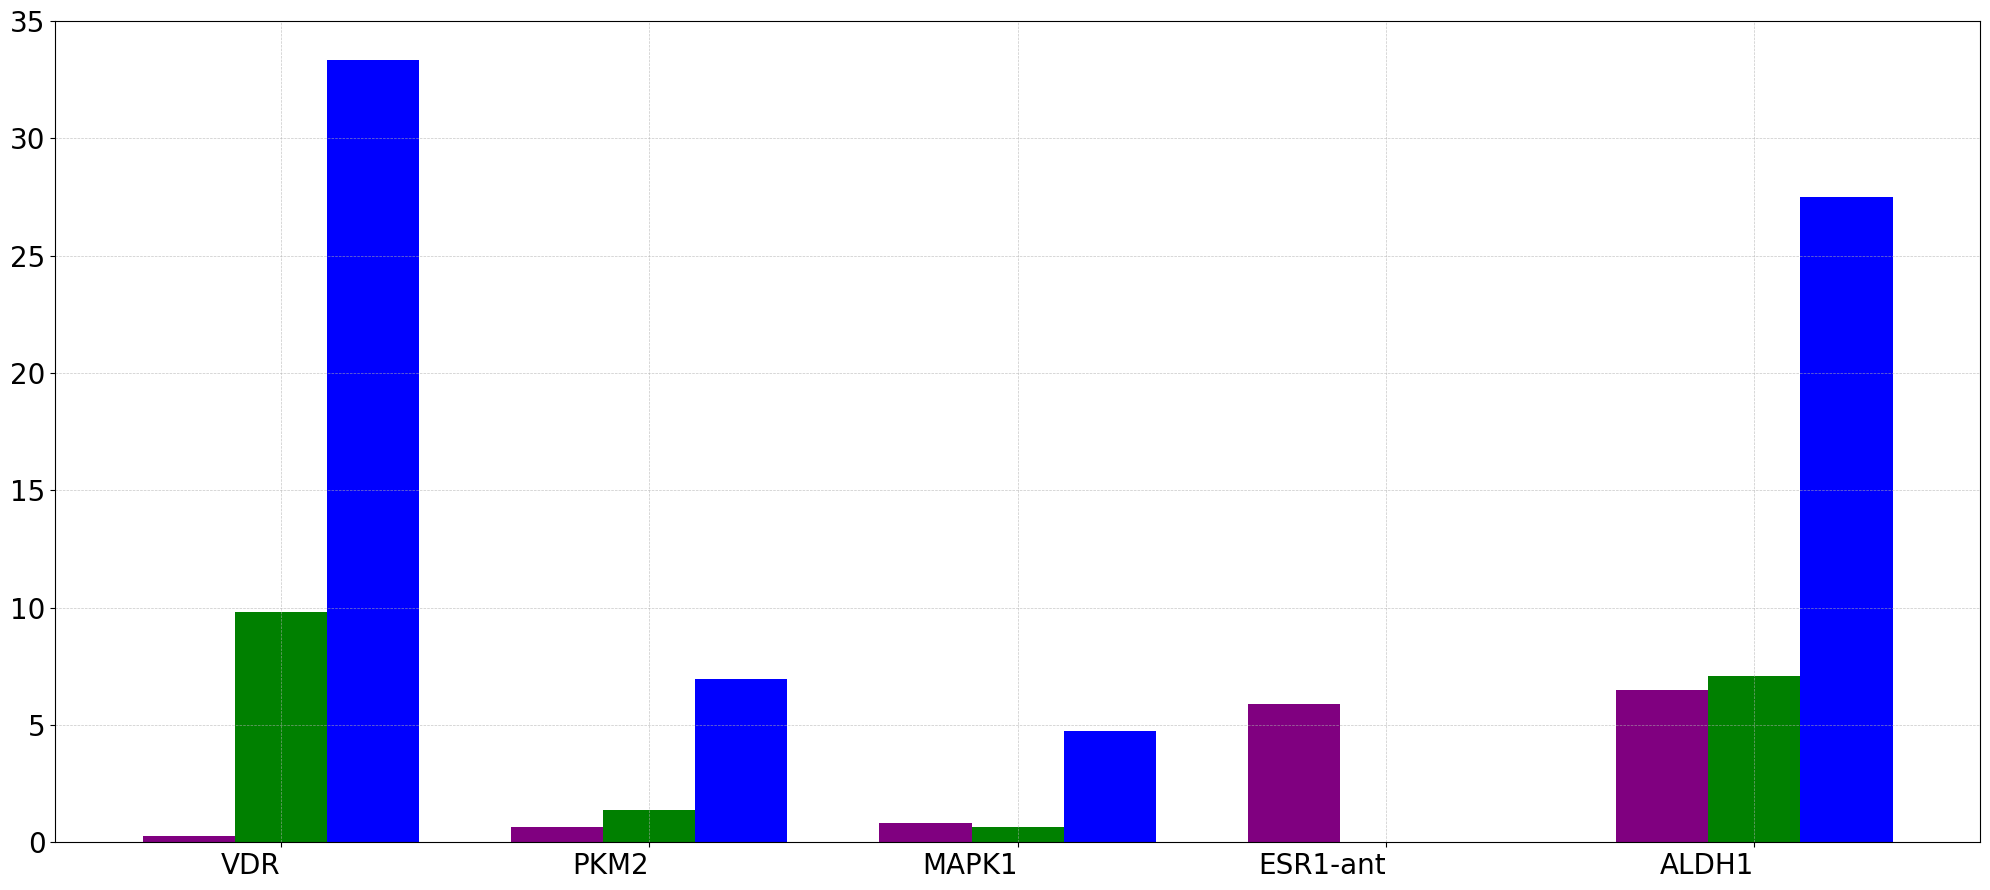

In [46]:
threshold_value = 1

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

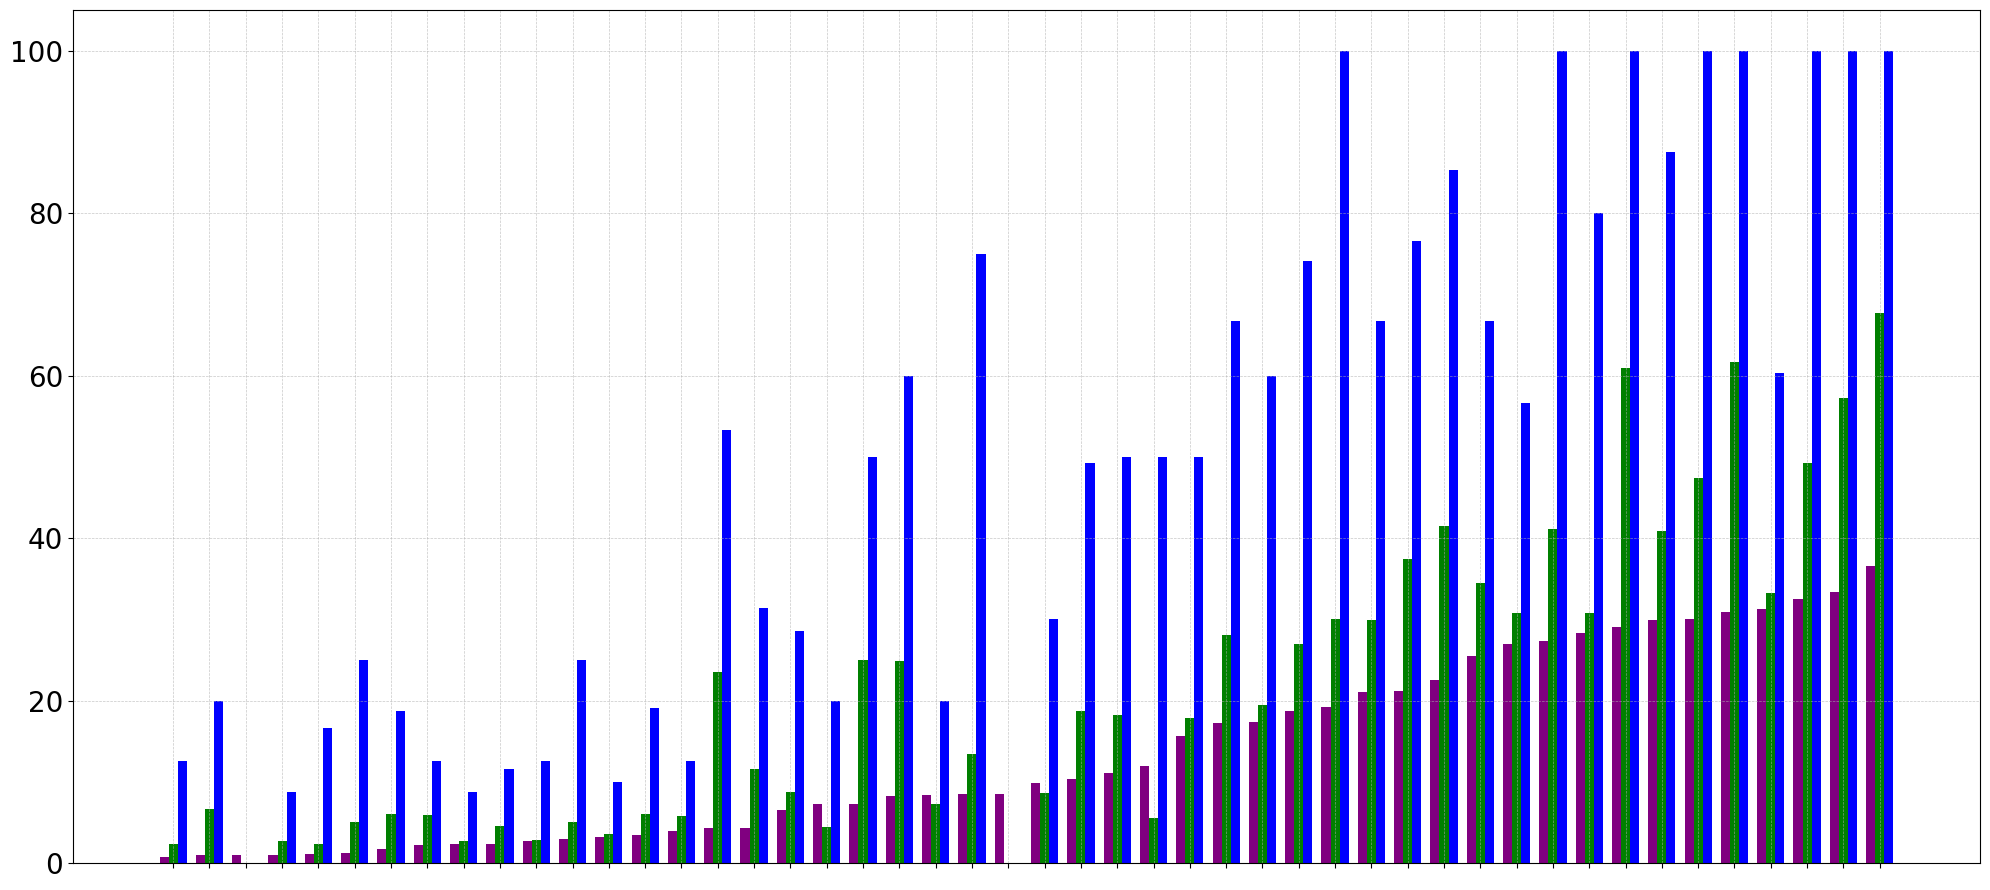

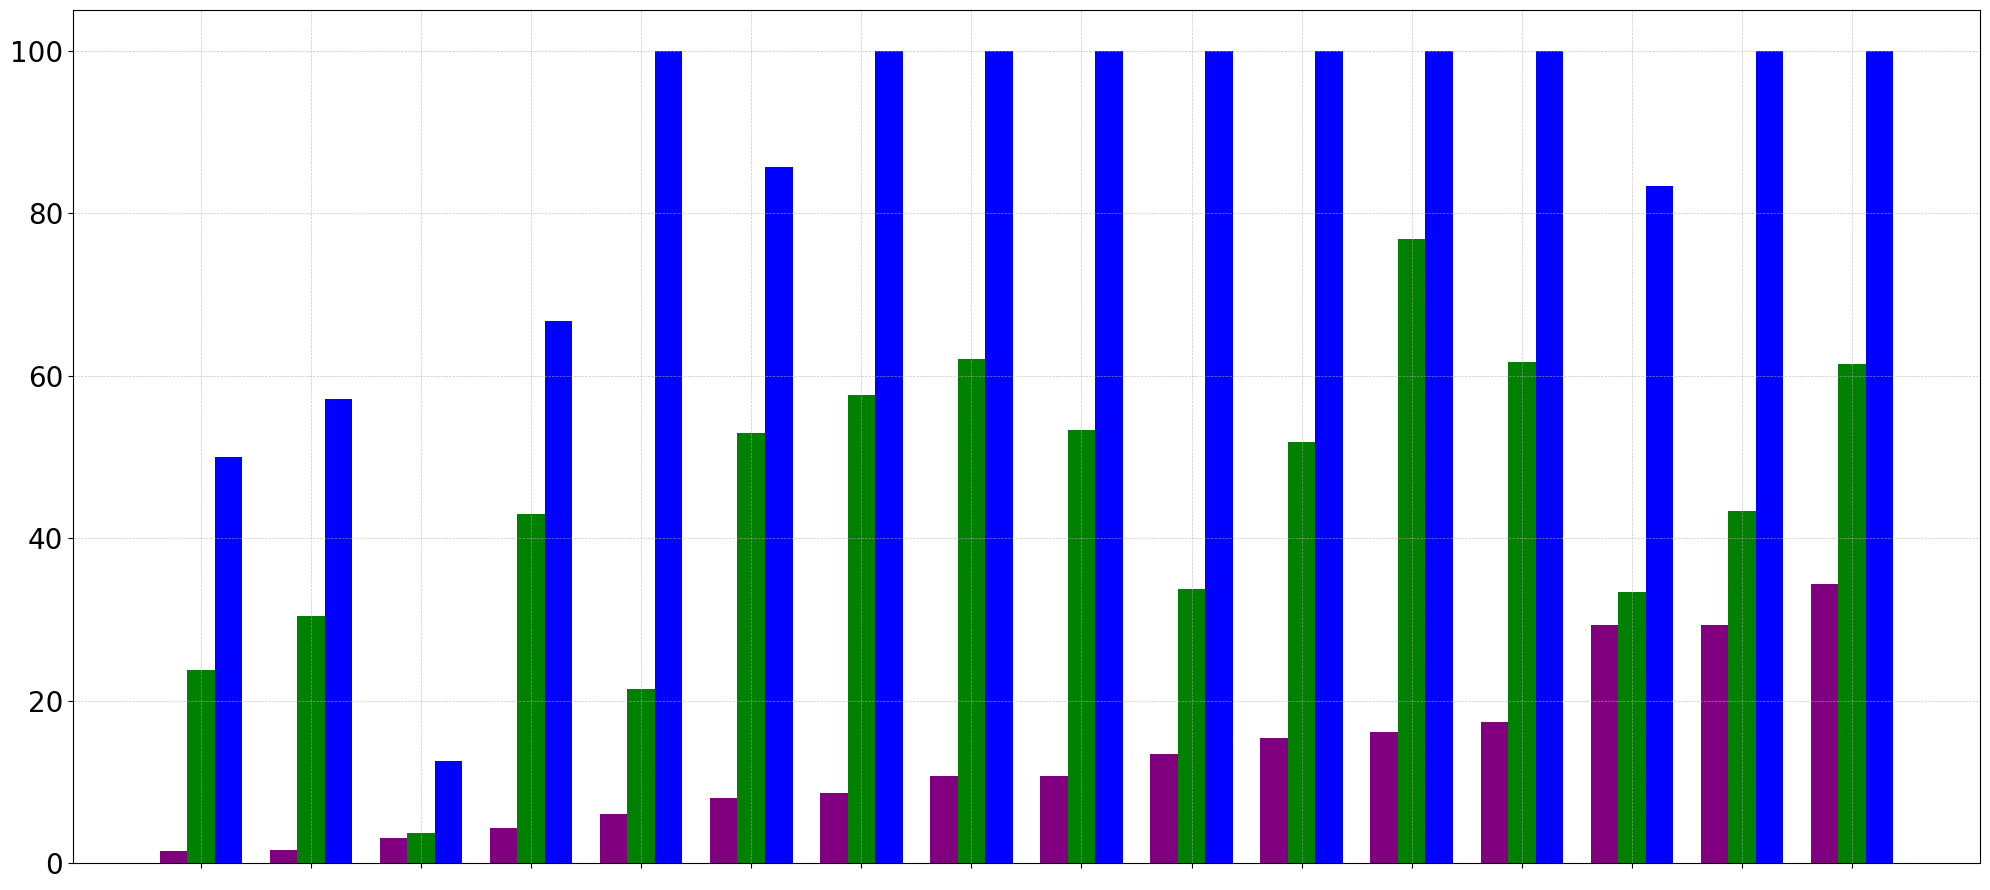

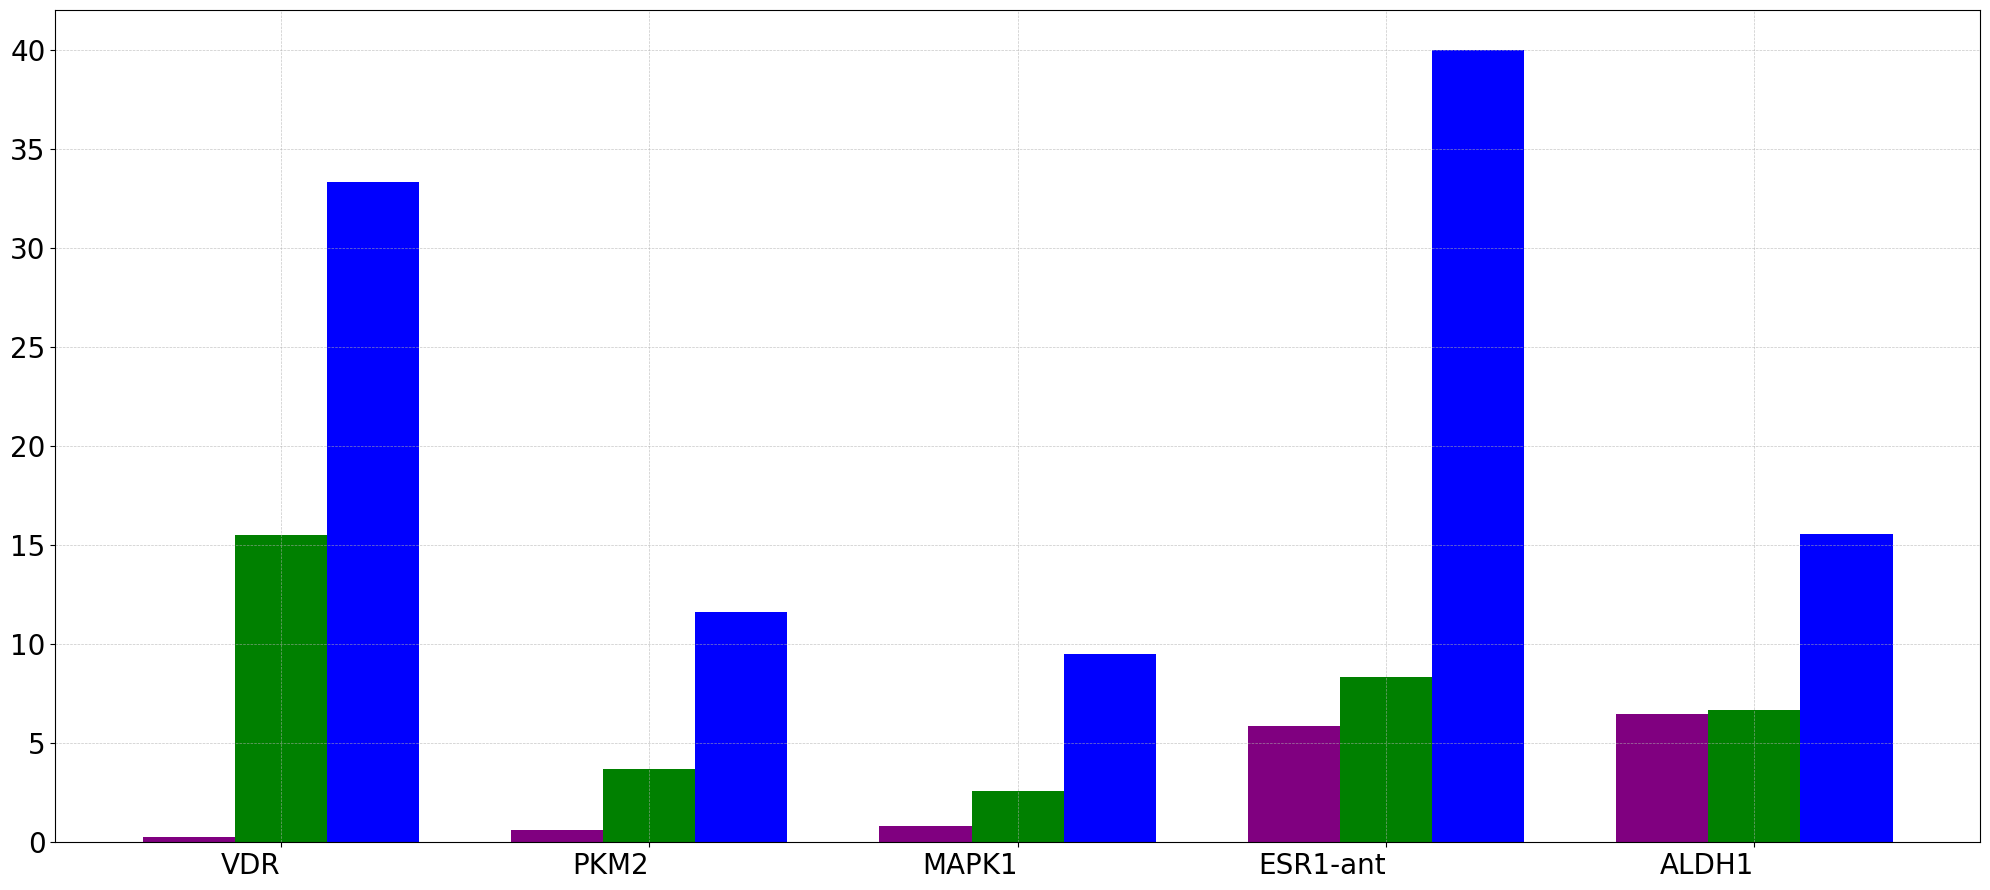

In [49]:
threshold_value = 3

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

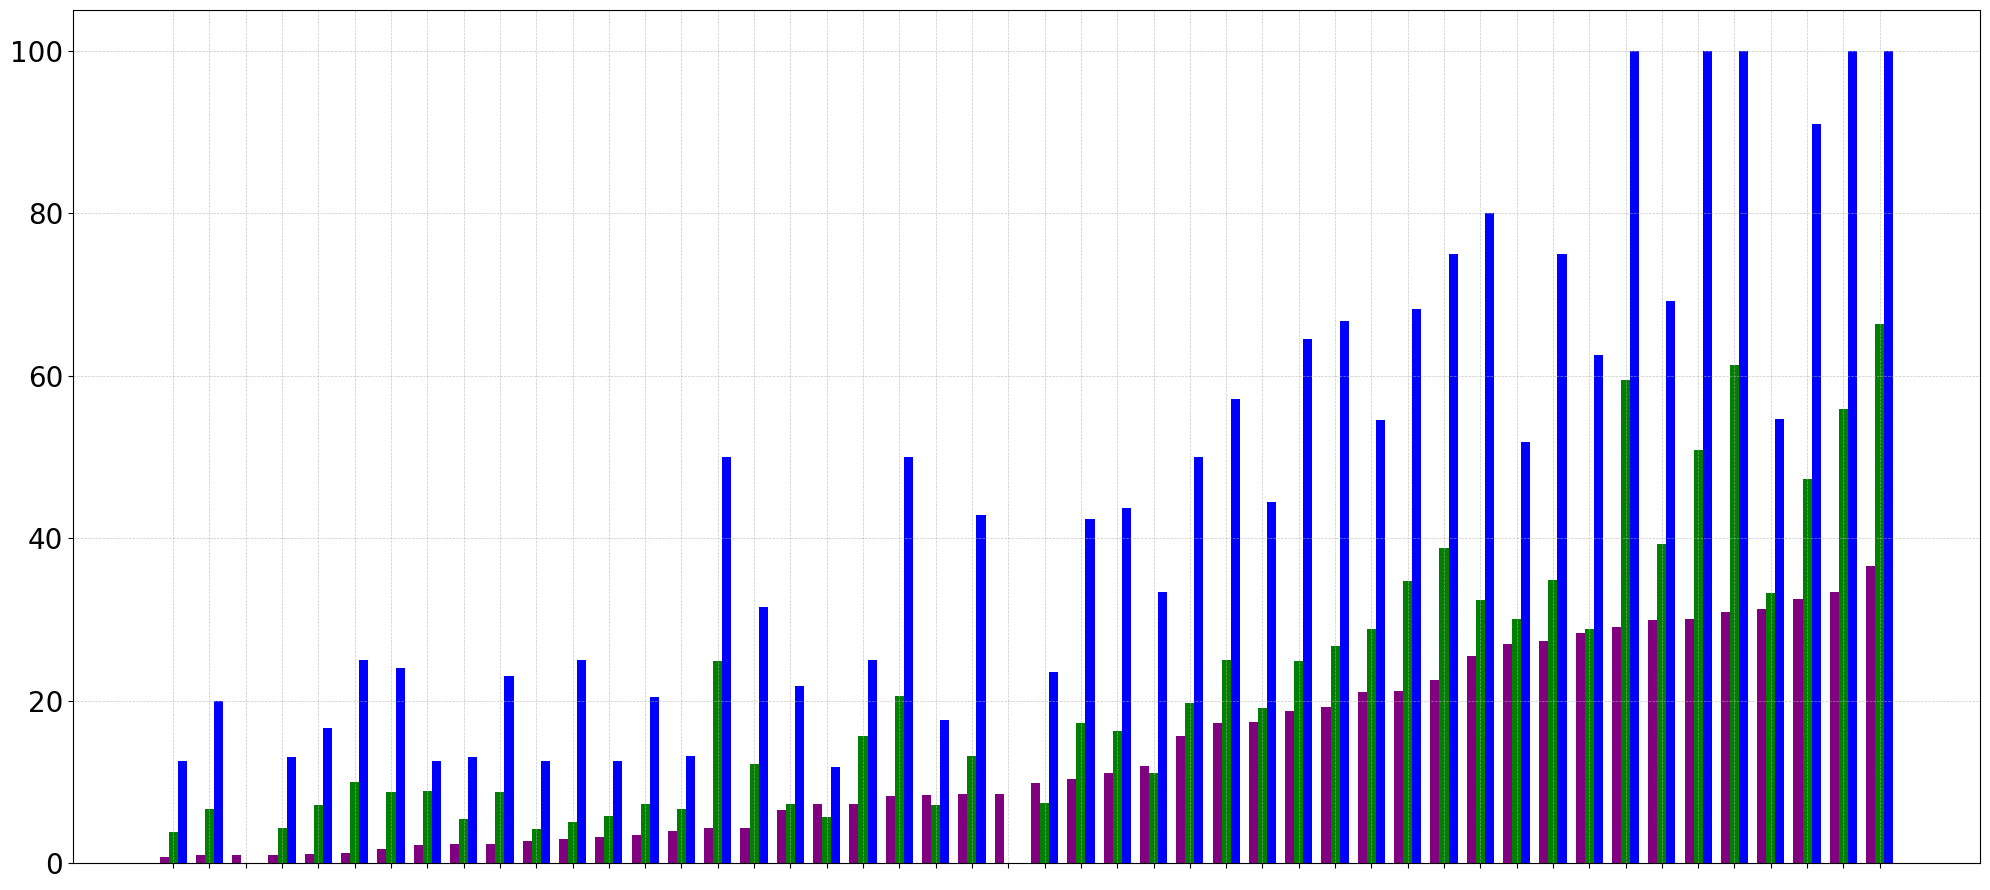

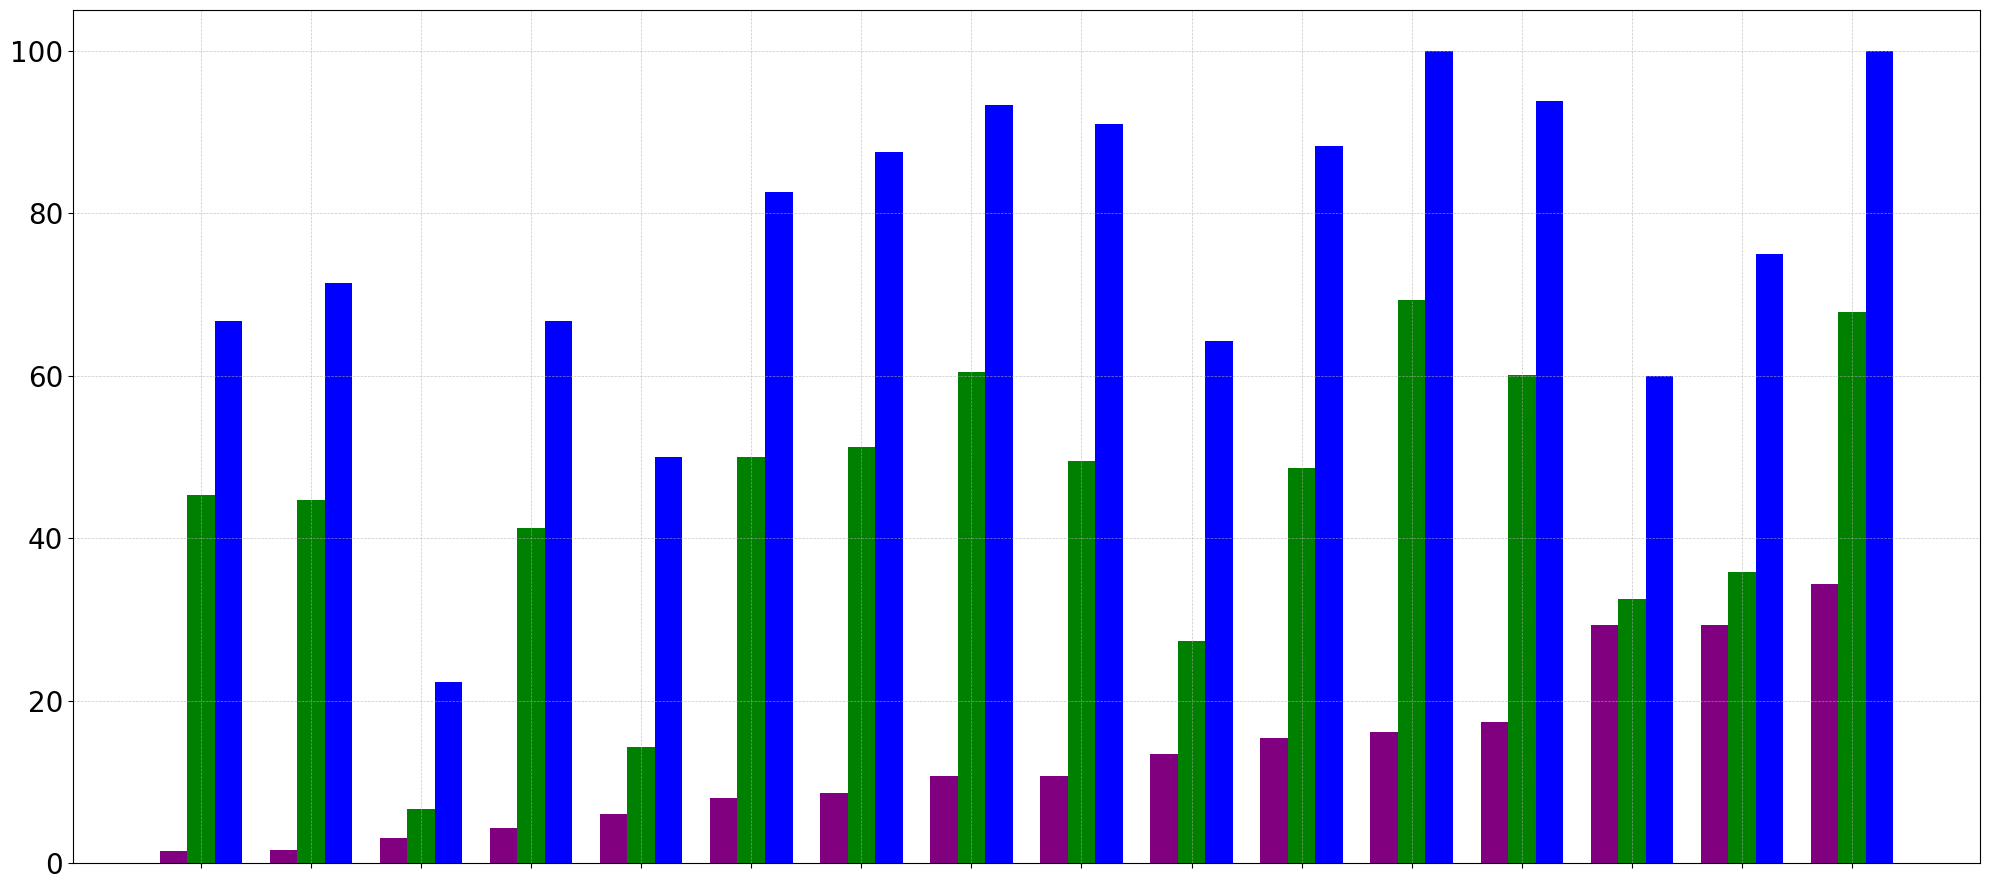

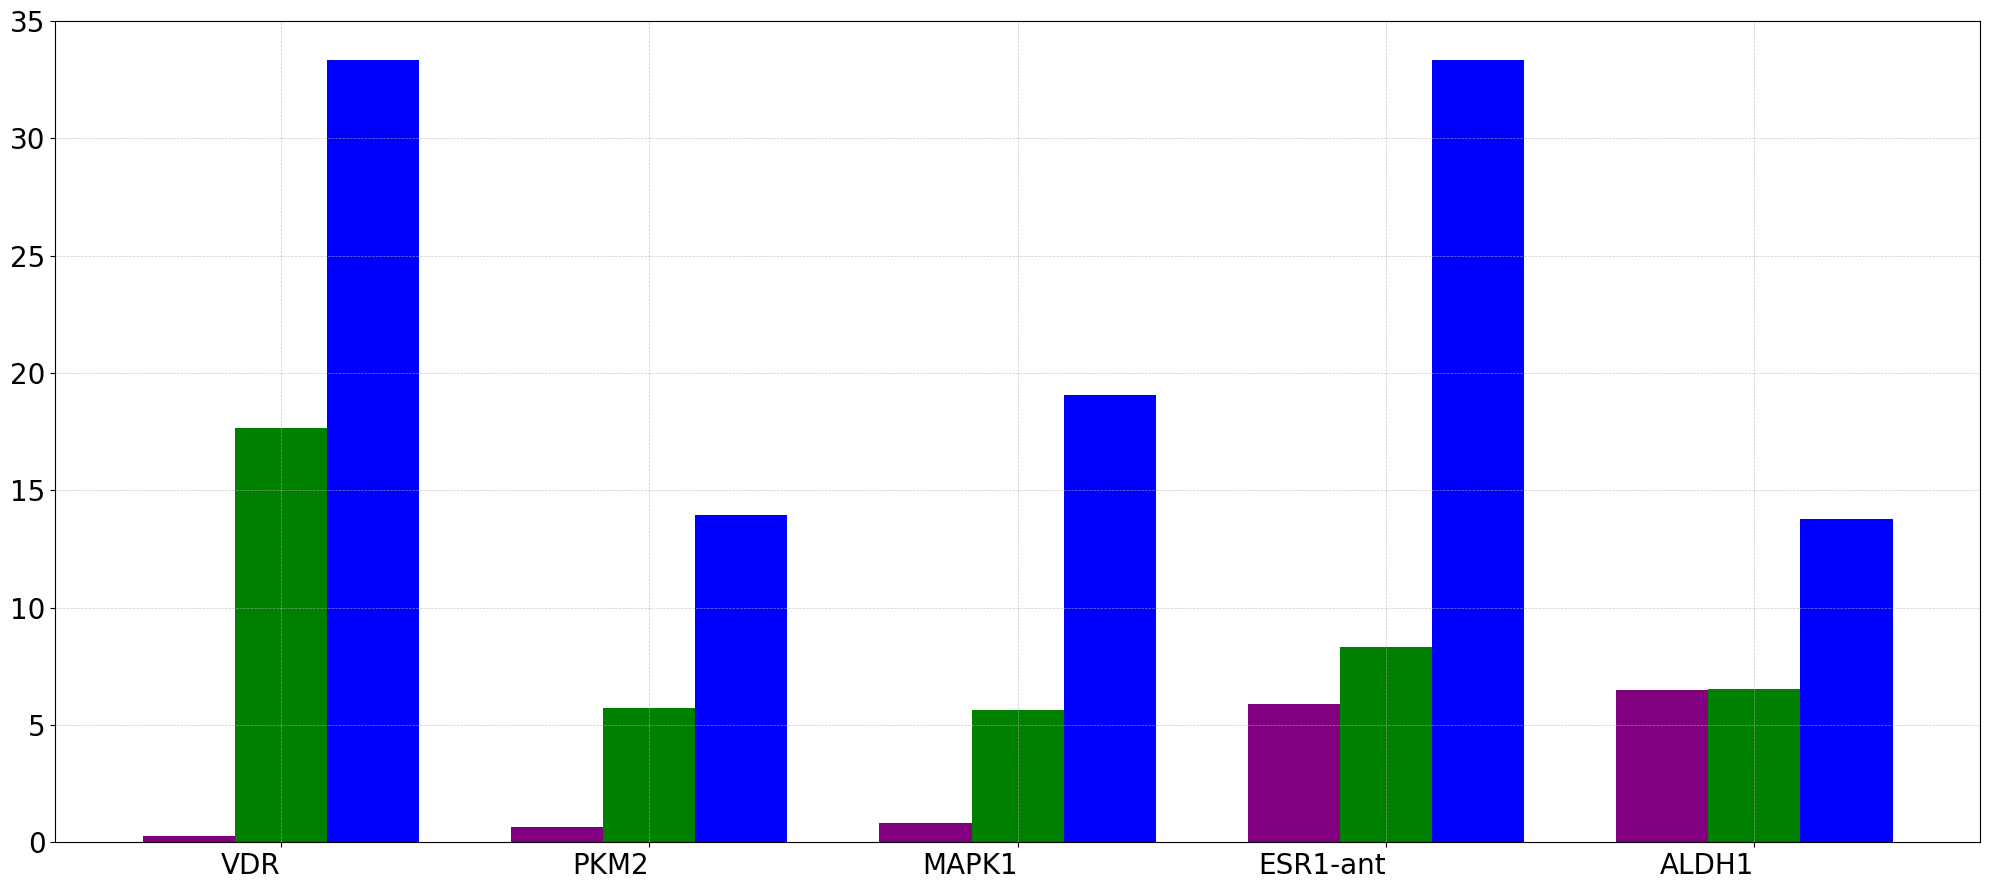

In [54]:
threshold_value = 5

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

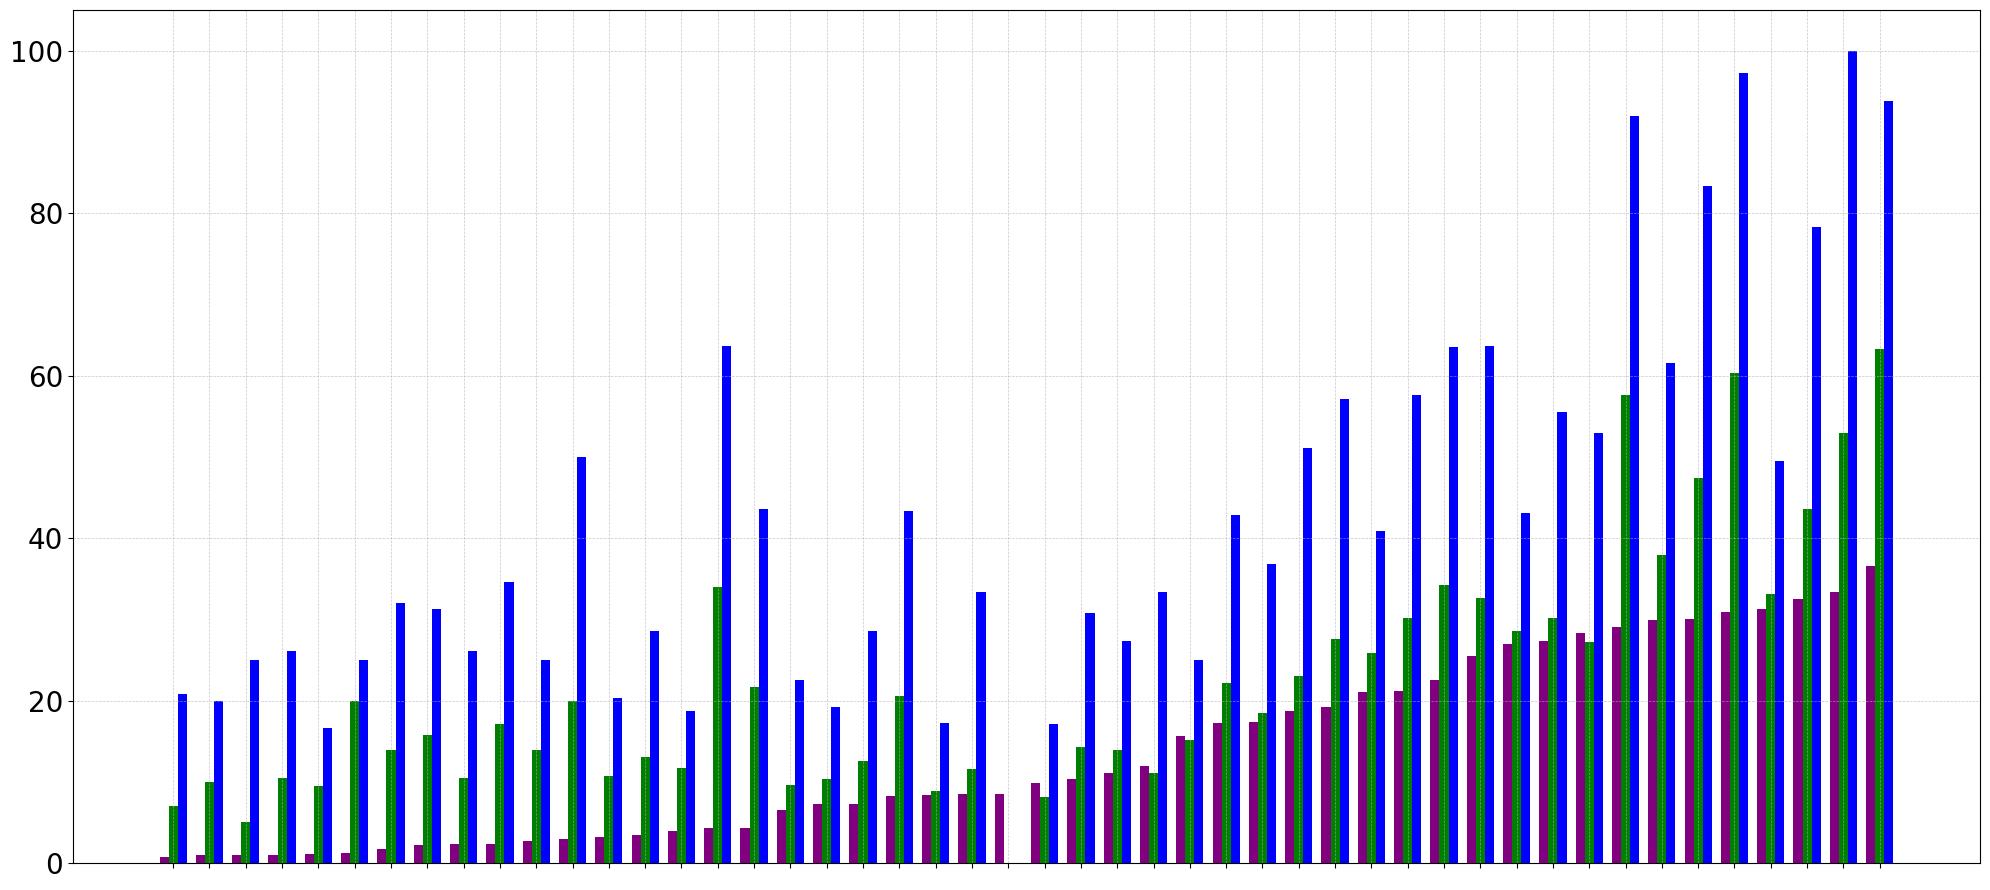

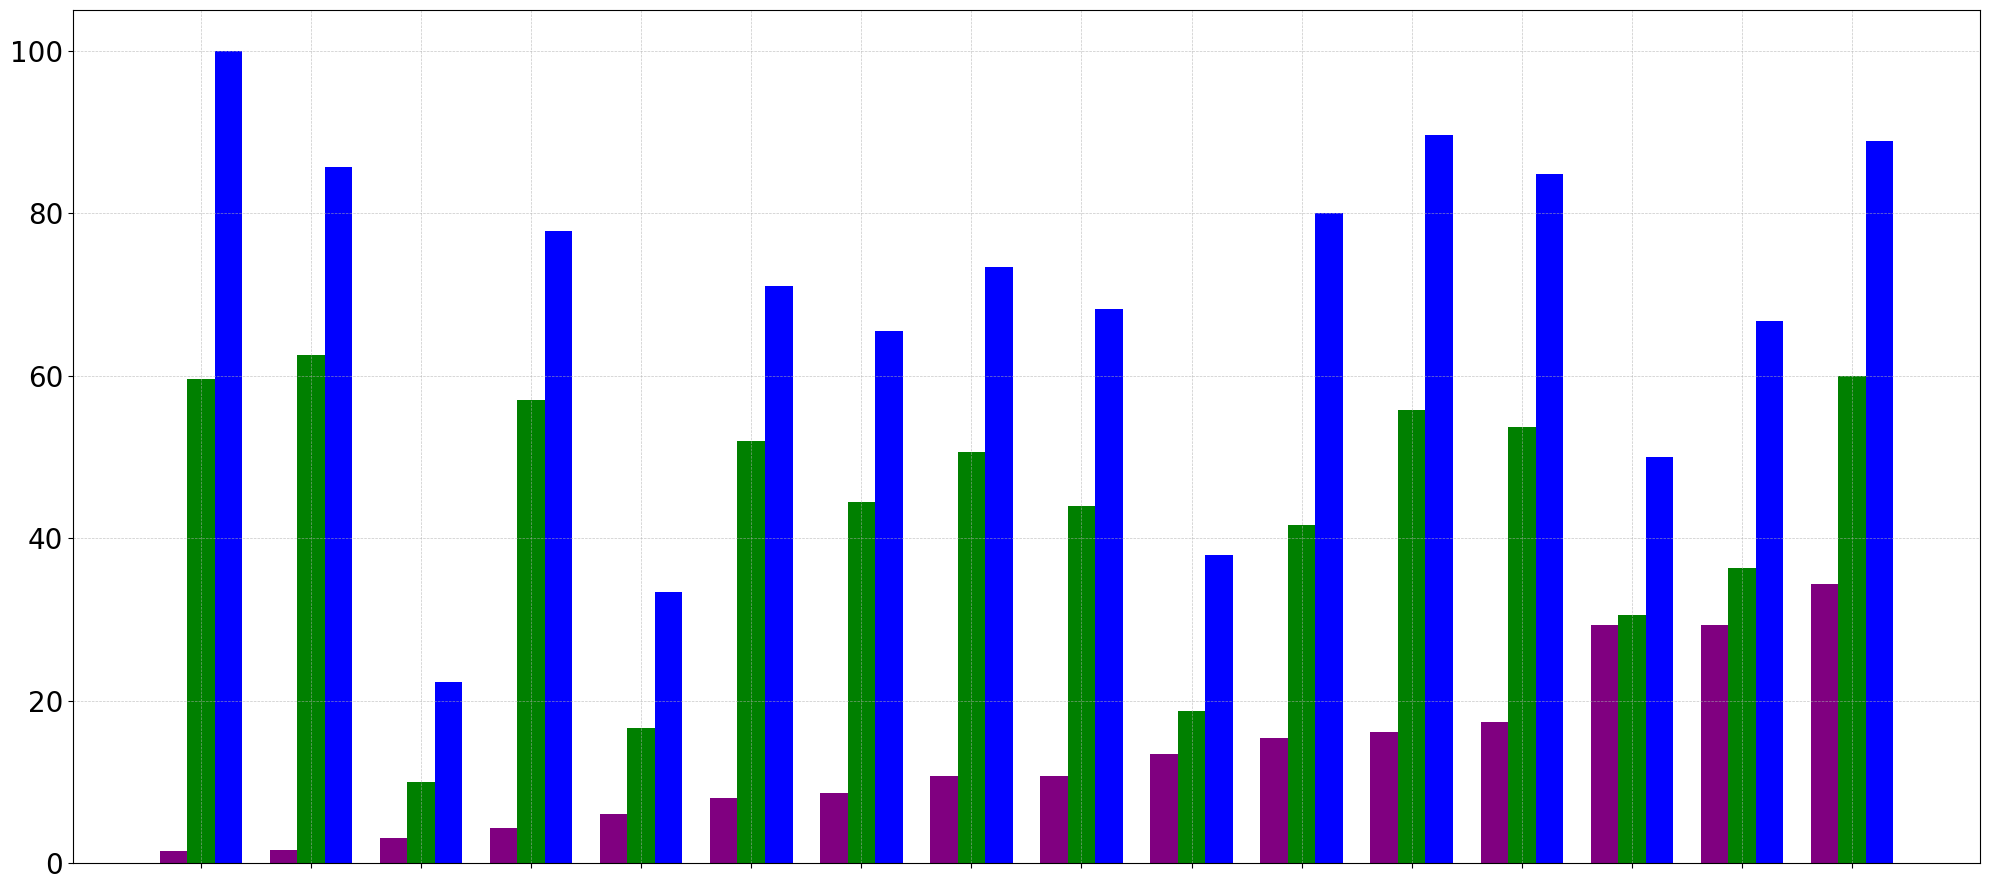

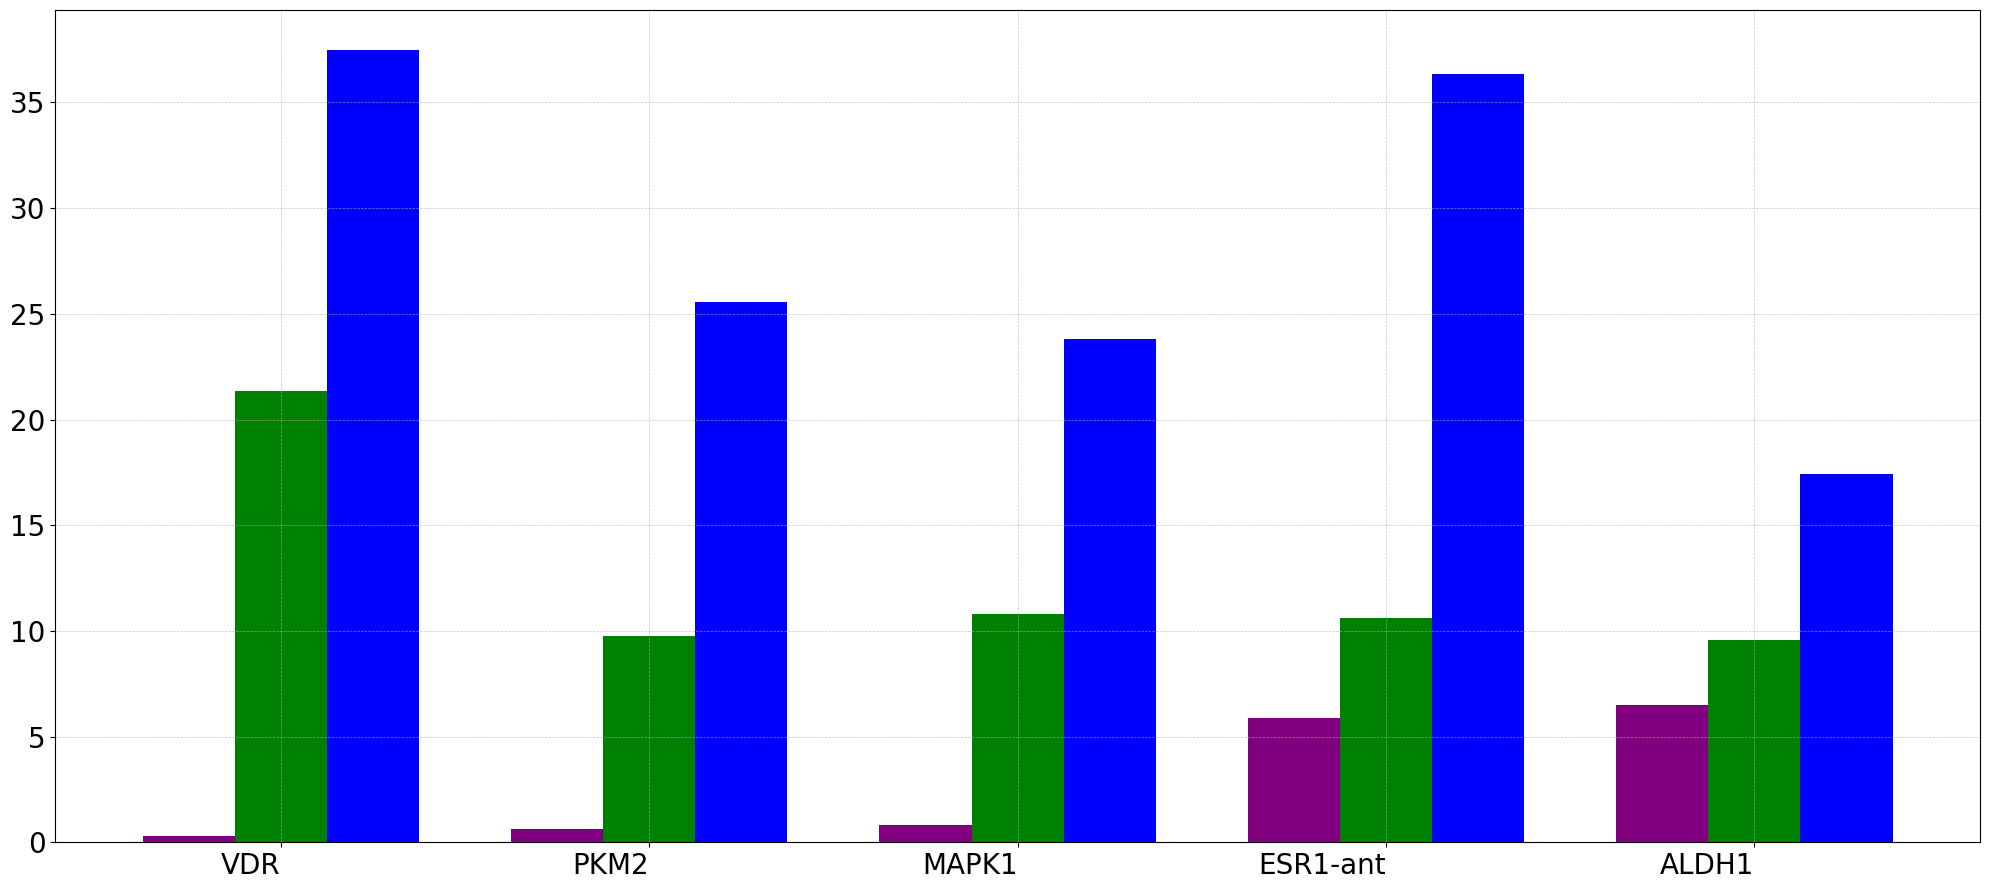

In [55]:
threshold_value = 10

plot_result_model(chembl_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(curie_results_dino, figsize=(20, 9), threshold_value=threshold_value)
plot_result_model(lit_pcba_results_dino, plot_names=True, figsize=(20, 9), threshold_value=threshold_value)

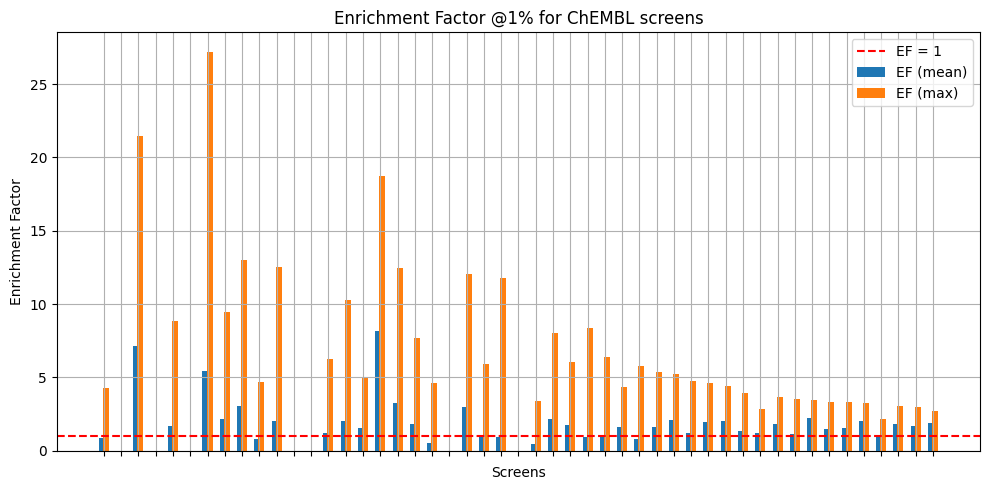

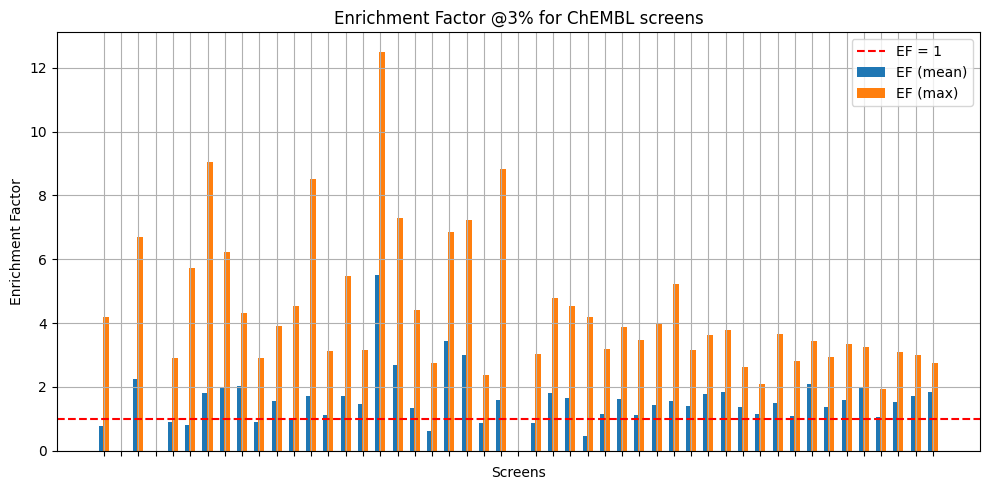

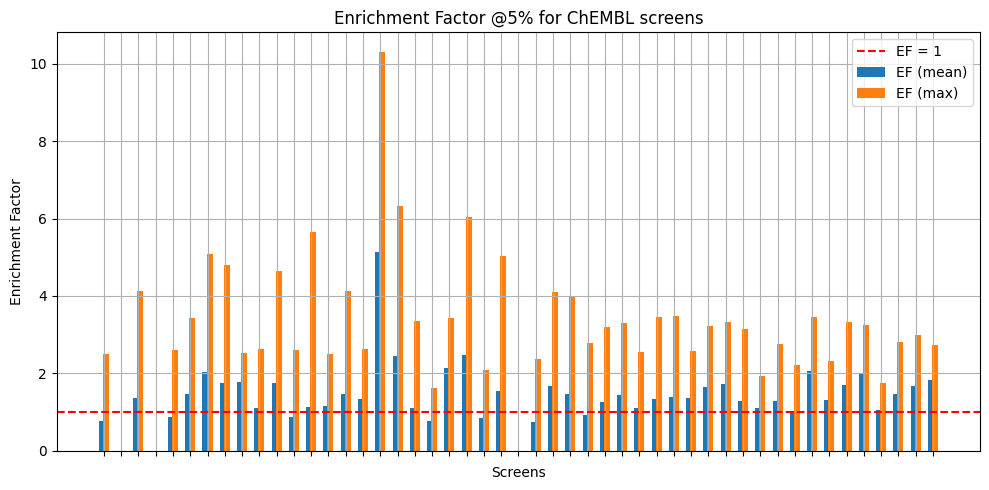

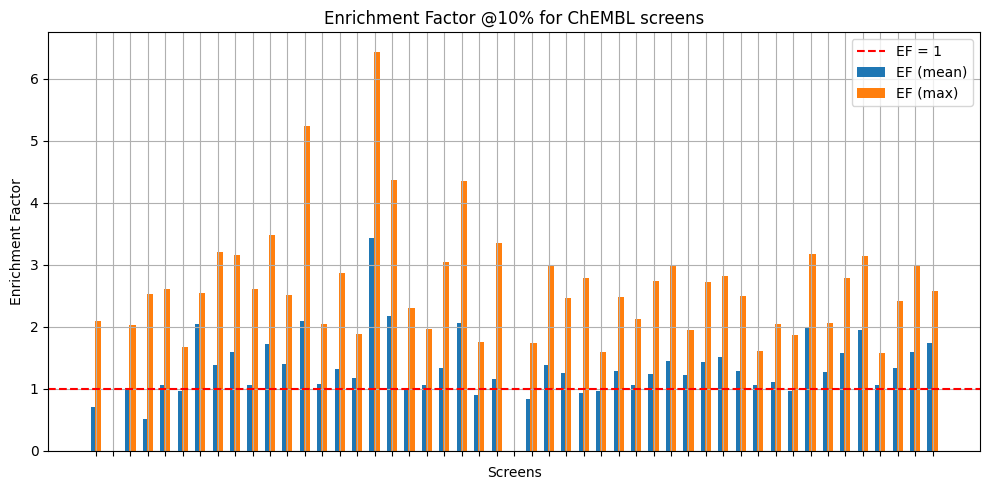

In [115]:
plot_EF(chembl_results_dino, "ChEMBL screens")

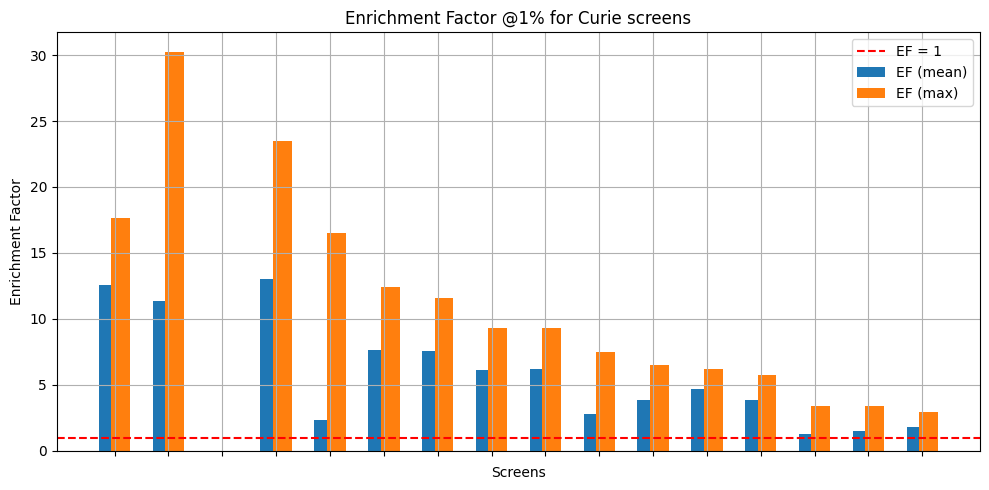

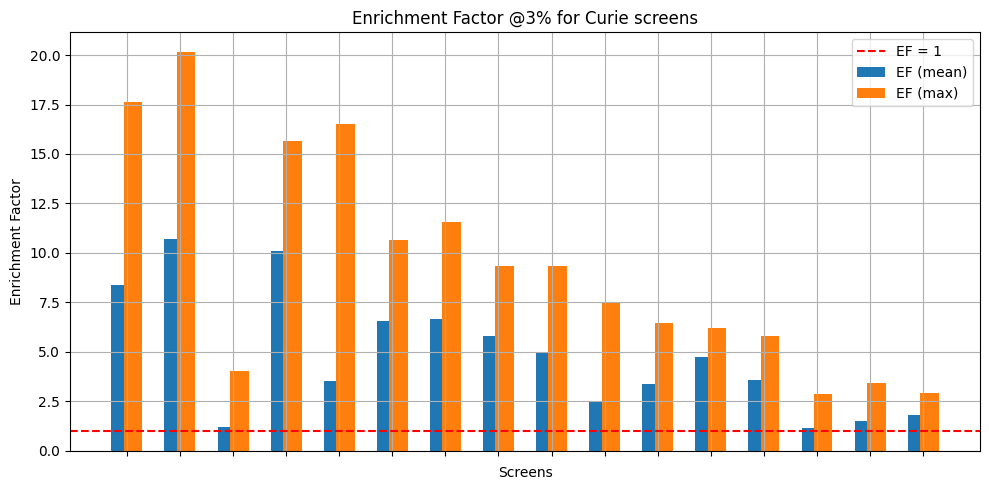

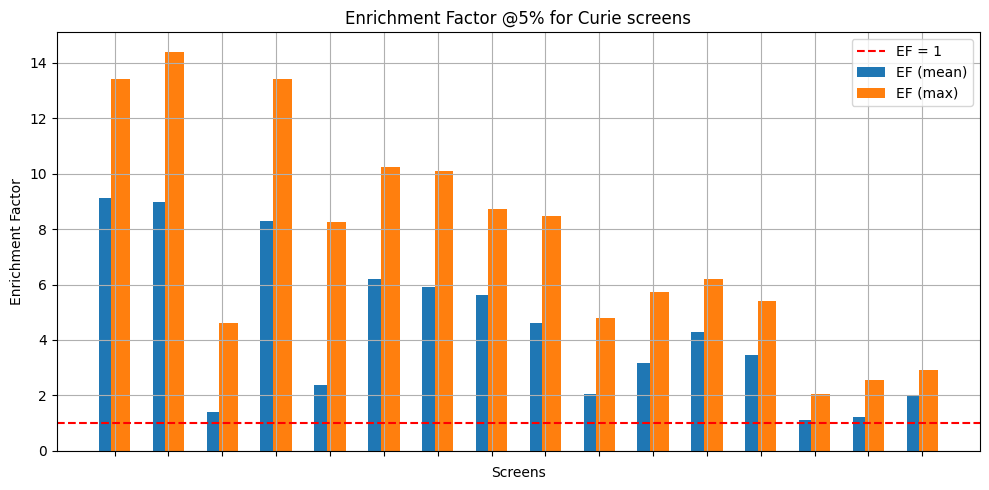

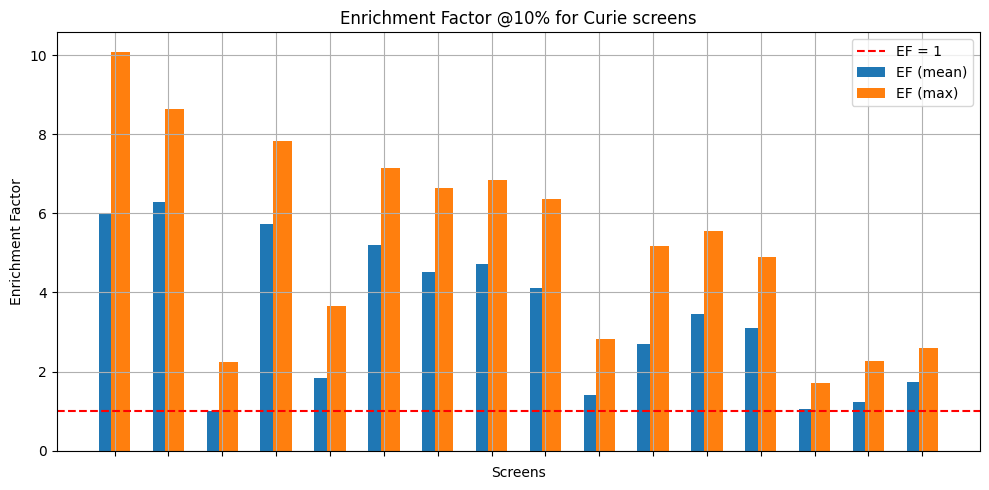

In [114]:
plot_EF(curie_results_dino, "Curie screens")

In [113]:

lit_pcba_results_dino[lit_pcba_results_dino['Threshold']==5]

Source    Screen Threshold        EF                     Normalized_EF  \
                                      mean    median       max          mean   
2   Lit-PCBA     ALDH1         5  1.006116  0.913345  2.131139      6.511758   
6   Lit-PCBA  ESR1-ant         5  1.416667  1.888889  5.666667      8.333333   
10  Lit-PCBA     MAPK1         5  1.131347  0.957294  3.829176      5.627706   
14  Lit-PCBA      PKM2         5  1.144375  0.932454  2.797362      5.708245   
18  Lit-PCBA       VDR         5  3.536236  2.502054  6.672144     17.666667   

                         Hit Rate Selected                      \
       median        max              mean    median       max   
2    5.911330  13.793103          0.065118  0.059113  0.137931   
6   11.111111  33.333333          0.083333  0.111111  0.333333   
10   4.761905  19.047619          0.009380  0.007937  0.031746   
14   4.651163  13.953488          0.007327  0.005970  0.017910   
18  12.500000  33.333333          0.009953  0.007042  0.018779   

   Hit Rate Random N Selected             N Hits N Compounds  
              mean       mean median  max   mean        mean  
2         0.064722      203.0  203.0  203  264.0      4079.0  
6         0.058824        9.0    9.0    9   11.0       187.0  
10        0.008291      126.0  126.0  126   21.0      2533.0  
14        0.006403      335.0  335.0  335   43.0      6716.0  
18        0.002815      426.0  426.0  426   24.0      8527.0

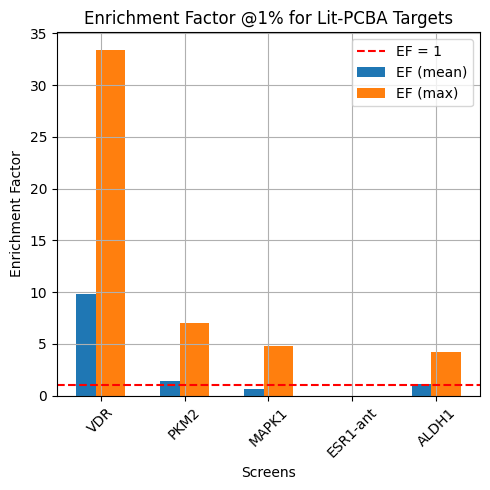

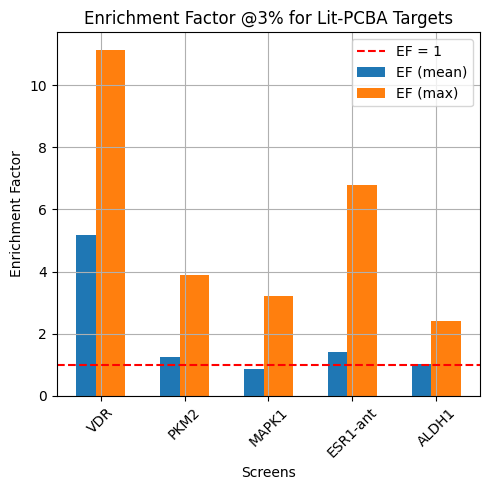

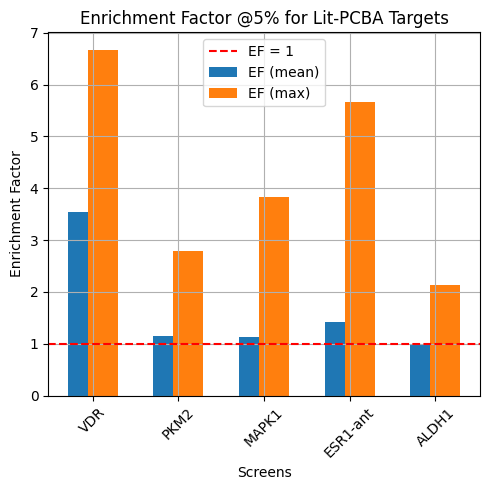

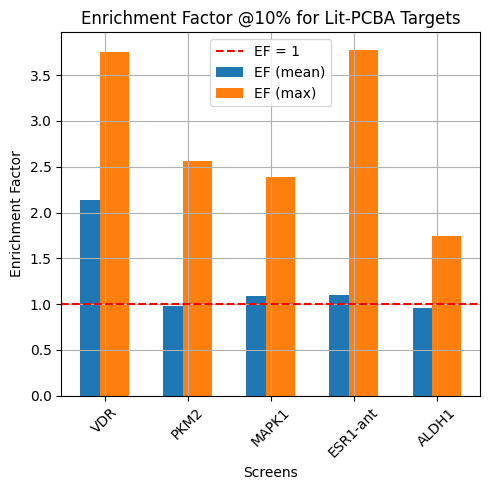

In [110]:
plot_EF(lit_pcba_results_dino, "Lit-PCBA Targets", (5,5), True)